# Supervised Learning I

## Block I: Fundamentals
I.1 What is Supervised Learning?<br>
I.2 Loss functions<br>
I.3 Probabilities and Bayes' theorem<br>
I.4 Likelihood functions<br>
I.5 Ordinary Linear Least Squares Regression<br>
I.6 Nonlinear regression and numerical methods<br>

## Block II: Bayesian inference
II.1 Overview<br>
II.2 Bayesian least squares<br>
II.3 Priors<br>
II.4 Worked example: Inferring intrinsic distance distribution<br>
II.5 Data with errors on both axes<br>
II.6 Sampling methods

## Block III: Some useful methods
III.1 Linear Discriminant Analysis (LDA)<br>
III.2 Logistic Regression<br>
III.3 Locally Estimated Scatterplot Smoothing (LOESS)<br>

## Block IV: Support Vector Machines (SVM)
IV.1 Motivation<br>
IV.2 Risk functional and empirical risk minimisation<br>
IV.3 VC dimension and error bounds<br>
IV.4 Maximum-margin classifier and fast convergence<br>
IV.5 SVM<br>
IV.6 LSSVR

## Block I: Fundamentals

### I.1 What is Supervised Learning?

* Let $\vec x_1, \vec x_2, \ldots, \vec x_N$ denote $N$ given feature vectors (a.k.a. "inputs", "attributes", etc).
* Let $y_1, y_2, \ldots, y_N$ denote $N$ given labels.
* Example: $\vec x$ could be a stellar spectrum and $y$ could be the star's effective temperature.
* Goal: Find a function $y=f(\vec x|\theta)$ that predicts $y$ from given $\vec x$, using parameters $\theta$.
* The set of
\begin{equation}
D=\{(\vec x_n,y_n)\}_{n=1}^N
\end{equation}
is called a <font color='red'>labelled training data set</font>.
* Inferring $y=f(\vec x|\theta)$ from a labelled training set is called <font color='red'>Supervised Learning</font>.
* If a training set comes without any labels, this is called <font color='red'>Unsupervised Learning</font>.
* Aside: There is also <font color='red'>Semi-Supervised Learning</font>, if the training set is partly labelled and partly unlabelled.

* Example A: Features are $\vec x=($height, weight$)^T$ and the labels are female/male. (Labels are categorical, i.e., this is called <font color='red'>classification</font>).

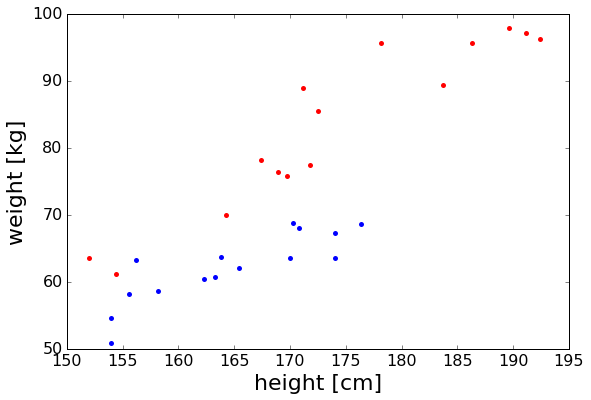

In [1]:
import numpy
from matplotlib import use
use('Qt5Agg')
import matplotlib.pyplot as plt
%matplotlib inline  
# Create toy data.
HeightMale   = numpy.array([191.2,168.9,169.7,164.3,183.7,152.0,192.4,167.4,178.2,172.5,189.6,154.4,171.8,171.2,186.3])
HeightFemale = numpy.array([154.0,163.3,156.2,165.4,170.8,154.0,176.4,174.0,170.0,174.0,158.2,163.8,155.6,162.3,170.3])
WeightMale   = numpy.array([97.1,76.4,75.8,70.0,89.4,63.5,96.3,78.2,95.6,85.5,97.9,61.1,77.4,89.0,95.7])
WeightFemale = numpy.array([50.8,60.7,63.3,62.1,68.1,54.6,68.6,63.6,63.6,67.3,58.6,63.7,58.2,60.4,68.8])
# Plot two classes.
plt.figure(1, figsize=(9,6))
plt.plot(HeightMale,   WeightMale,   'o', ms=5, mew=0, color='red')
plt.plot(HeightFemale, WeightFemale, 'o', ms=5, mew=0, color='blue')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('height [cm]', fontsize=22)
plt.ylabel('weight [kg]', fontsize=22)

* Example B: Features are $\vec x=($height$)$ and the labels are weights. (Labels are continues, i.e., this is called <font color='red'>regression</font>).

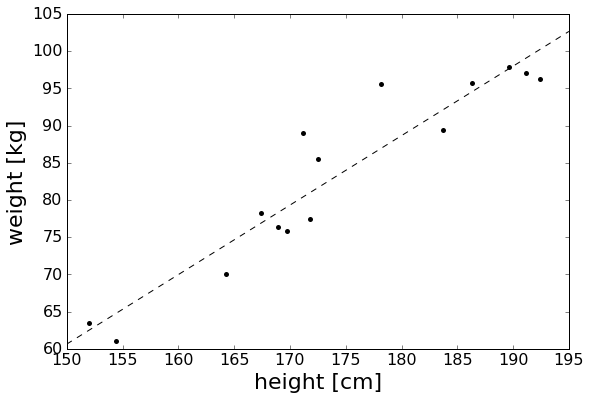

In [2]:
# Plot two classes.
plt.figure(2, figsize=(9,6))
plt.plot([150,195], [60.63,102.66], '--', lw=1, color='black')
plt.plot(HeightMale, WeightMale, 'o', ms=5, mew=0, color='black')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('height [cm]', fontsize=22)
plt.ylabel('weight [kg]', fontsize=22)

### I.2 Loss functions

* Goal: Find a function $y=f(\vec x|\theta)$ that predicts $y$ from given $\vec x$, using parameters $\theta$.
* How to measure if $f(\vec x|\theta)$ gives a good prediction of $y$?
* For a single example $(\vec x,y)$, the prediction error is measured by a <font color='red'>loss function</font> $L(y,f(\vec x|\theta))$.
* For a labelled training set $D=\{(\vec x_n,y_n)\}_{n=1}^N$, the prediction error is measured by the <font color='red'>expected loss</font> (a.k.a. <font color='red'>training error</font>):
\begin{equation}
\langle L\rangle=\frac{1}{N}\sum_{n=1}^N L(y_n,f(\vec x_n|\theta))
\end{equation}
* We <font color='red'>fit parameters</font> by minimising the expected loss:
\begin{equation}
\hat\theta=\arg\min_\theta\langle L\rangle
\end{equation}
Aside: This is also known as <font color='red'>empirical risk minimisation</font> (see later SVM).
* Two warnings:<br>
(1) Certain technical conditions have to be met such that this actually produces a good model.<br>
(2) Even if these conditions are met, how much training data is needed to get to a good model?

* Two-class classification problem, $y=\pm 1$, the zero-one loss function is often used:
\begin{equation}
L(y,f(\vec x|\theta)) = \frac{1}{2}\left(1-y\cdot f(\vec x|\theta)\right)
=\left\{\begin{array}{ll}
0 & \textrm{if correctly classified} \\
1 & \textrm{if misclassified} \\
\end{array}\right.
\end{equation}
Its expected loss is also known as <font color='red'>misclassification rate</font>.

* For regression, the squared-error loss is often used:
\begin{equation}
L(y,f(\vec x|\theta)) = \left(y-f(\vec x|\theta)\right)^2
\end{equation}
The absolute-error loss is also very popular since less sensitive to outliers:
\begin{equation}
L(y,f(\vec x|\theta)) = \left|y-f(\vec x|\theta)\right|
\end{equation}

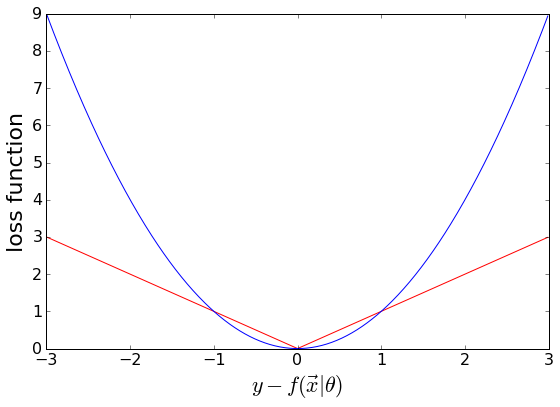

In [3]:
# Plot squared-error loss and absolute-error loss.
Error = numpy.arange(-3.0, 3.0, 0.01)
plt.figure(3, figsize=(9,6))
plt.plot(Error, numpy.abs(Error), '-', lw=1, color='red')
plt.plot(Error, Error**2, '-', lw=1, color='blue')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$y-f(\vec x|\theta)$', fontsize=22)
plt.ylabel('loss function', fontsize=22)

### I.3 Probabilities and Bayes' theorem

* These loss functions are <font color='red'>engineering</font> choices. They know nothing about measurement errors and usually do not provide uncertainty estimates on their results.
* We are looking for <font color='red'>scientific</font> choices. Therefore, we need to talk about probabilities.
* Let us "loosely" define <font color='red'>probability density function</font> (PDF) via the three axioms:

\begin{equation}
\textrm{(i) non-negativity:}\quad P(x)\geq 0 \quad\forall x\in\mathbb{R}
\end{equation}

\begin{equation}
\textrm{(ii) normalisation:}\quad \int P(x)dx=1
\end{equation}

\begin{equation}
\textrm{(iii) mutually exclusive and independent events:}\quad P(E_1,E_2,\ldots,E_N)=\sum_{n=1}^N P(E_n)
\end{equation}

* Aside: Instead of a PDF, we can alternatively define a probability distribution via its <font color='red'>cumulative distribution function</font> or its <font color='red'>characteristic function</font>.

* Warning on notations:<br>
In school you have learned that $f(a)$ and $f(b)$ are the identical function $f(\cdot)$ just with two different input arguments $a$ or $b$.<br>
In probability theory, $P(a)$ and $P(b)$ are two different PDFs, one for $a$ and one for $b$. In this convention, the argument is the identifier.

* You can <font color='red'>change variables</font> according to $P(a)da=P(b)db$ ("conservation of probability mass"), such that:
\begin{equation}
P(b) = P(a)\left|\frac{da}{db}\right|
\end{equation}

* Let $P(A,B)$ denote the <font color='red'>joint probability</font> of two events $A$ and $B$ occuring together.
* $P(A,B)$ is identical to the probability of $A$ occuring alone, $P(A)$, multiplied by the probability of $B$ occuring given that $A$ is true:
\begin{equation}
P(A,B)=P(A)P(B|A)
\end{equation}
The probability of $B$ given $A$, $P(B|A)$, is called <font color='red'>conditional probability</font>.
* Note that $P(B|A)\neq P(A|B)$.<br>
Example: Let $A=$female and $B=$pregnant, then $P($female$|$pregnant$)=1$ whereas $P($pregnant$|$female$)\ll 1$.
* From a joint probability $P(A,B)$, we can <font color='red'>marginalise</font> over one variable, e.g., $B$, by "integrating over all its values":
\begin{equation}
P(A)=\int P(A,B)dB=\int P(A|B)P(B)dB
\end{equation}
* Since the joint(!) probability is symmetric, $P(A,B)=P(B,A)$, we can also write
\begin{equation}
P(A,B)=P(A)P(B|A)=P(B)P(A|B)
\end{equation}
such that we obtain <font color='red'>Bayes' theorem</font>:
\begin{equation}
P(A|B)=\frac{P(A)P(B|A)}{P(B)}
\end{equation}

* Let us choose $A=\theta$ and $B=D=\{(\vec x_n,y_n)\}_{n=1}^N$, then we obtain:
\begin{equation}
P(\theta|D)=\frac{P(\theta)P(D|\theta)}{P(D)}
\end{equation}
$P(\theta|D)$ is the <font color='red'>posterior probability</font> of the parameters $\theta$ given the data $D$.<br>
$P(\theta)$ is the <font color='red'>prior probability</font> of the parameters $\theta$ <i>before</i> seeing data $D$.<br>
$P(D|\theta)$ is the <font color='red'>likelihood function</font> of the data $D$ given the parameters $\theta$.<br>
$P(D)$ is the <font color='red'>evidence</font> of the data $D$ regardless of any parameters.<br>

* Bayesians maximise the posterior. They find the parameter values that have the highest probability given the data:
\begin{equation}
\hat\theta_\textrm{MPE}=\arg\max_\theta P(\theta|D)
\end{equation}
For Bayesians, the posterior replaces the loss function.

* Getting the posterior PDF $P(\theta|D)$ requires a prior PDF $P(\theta)$ that does not depend on data. This prior choice is subjective, different scientists will make different choices and thus arrive at different results even when given the same data.

* Frequentists refuse to accept this subjectiveness and rather find the parameter values that make the observed data to become the most likely measurement result:
\begin{equation}
\hat\theta_\textrm{MLE}=\arg\max_\theta P(D|\theta)
\end{equation}
For Frequentists, the likelihood replaces the loss function.

### I.4 Likelihood functions

* Both Bayesians and Frequentists need a likelihood function, $P(D|\theta)$.
* The likelihood function $P(D|\theta)$ is a PDF over the data but not over the parameters.
* $P(D|\theta)$ is fully determined by the measurement errors of the data and the model $f(\vec x|\theta)$.
* Let us assume that the labelled training data $D=\{(\vec x_n,y_n)\}_{n=1}^N$ are statistically independent (but not mutually exclusive), such that the likelihood factorises:
\begin{equation}
P(D|\theta)=\prod_{n=1}^N P_n(\vec x_n,y_n|\theta)
\end{equation}

* In principle, each data example $(\vec x_n,y_n)$ could have its down PDF $P_n(\vec x_n,y_n|\theta)$. So let us further simplify that not only the data are independent, but also identically distributed (this is called <font color='red'>i.i.d.</font>):
\begin{equation}
P(D|\theta)=\prod_{n=1}^N P(\vec x_n,y_n|\theta)
\end{equation}

* As an example, let us assume that the measurement errors are Gaussian, with standard deviations $\sigma_n$:
\begin{equation}
P(D|\theta)=\prod_{n=1}^N \frac{1}{\sigma_n\sqrt{2\pi}}\exp\left[-\frac{1}{2}\left(\frac{y_n - f(\vec x_n|\theta)}{\sigma_n}\right)^2\right]
\end{equation}
Using the nice mathematical properties of the exponential, we can rewrite this as:
\begin{equation}
P(D|\theta)=\frac{1}{(2\pi)^{N/2}(\prod_{n=1}^N \sigma_n)}\exp\left[-\frac{1}{2}\sum_{n=1}^N\left(\frac{y_n - f(\vec x_n|\theta)}{\sigma_n}\right)^2\right]
=\frac{1}{(2\pi)^{N/2}(\prod_{n=1}^N \sigma_n)} e^{-\chi^2/2}
\end{equation}
Where we have identified the infamous <font color='red'>chi-squared</font>:
\begin{equation}
\chi^2=\sum_{n=1}^N\left(\frac{y_n - f(\vec x_n|\theta)}{\sigma_n}\right)^2
\end{equation}

* The maximum of the likelihood $P(D|\theta)$ occurs at the minimum of $\chi^2$. Consequently, likelihood maximisation and minimisation of $\chi^2$ are equivalent and produce identical results. (Although minimising $\chi^2$ is usually much easier in practice.)

* Note how $\chi^2$ resembles the squared-error loss function. The only difference is that $\chi^2$ weighs the error in each data points by its measurement uncertainty $\sigma_n$.

* Warning: We have seen how $\chi^2$ arises if the likelihood is i.i.d. and the measurement errors are Gaussian. <font color='red'>If any of these two assumptions are broken, then minimising $\chi^2$ is the wrong thing to do!</font>

* As a scientist, you <i>always</i> want to use the data's measurement errors in order to build a likelihood function as seen above. These measurement errors then propagate into uncertainties of your parameter estimate $\hat\theta$. This is the crucial difference between scientific loss functions and engineering loss functions.

* Let us look at a very nasty example from real science: Gaia parallaxes
* Geometrically, a parallax angle $\varpi$ is related to the distance $d$ by the seemingly harmless relation $\varpi=\frac{1000}{d}$ (parallax in milli-arcsec, distance in pc). The whole point of building the Gaia satellite was to measure parallax angles for ~1 billion stars in order to infer their distances.
* From the measurement process, you have a Gaussian error $\sigma_\varpi$ on the parallax, i.e., the likelihood function reads:
\begin{equation}
P(\varpi|d) = \frac{1}{\sigma_\varpi\sqrt{2\pi}}\exp\left[-\frac{1}{2}\left(\frac{\varpi-\frac{1000}{d}}{\sigma_\varpi}\right)^2\right]
\end{equation}
* Let us take the star Betelgeuse in the constellation Orion. Its parallax measurement is $\varpi=6.55$mas with an error of $\sigma_\varpi=0.83$mas.

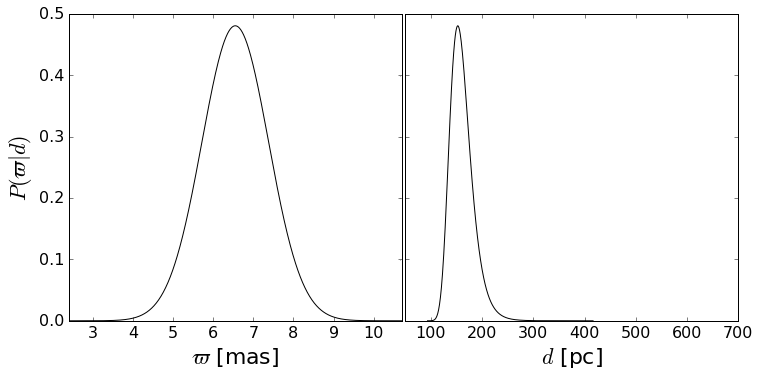

In [40]:
# Define parallax value and its error.
value = 6.55
sigma = 0.83
# Sample likelihood along parallax and distance.
Varpi      = numpy.arange(value-5*sigma, value+5*sigma, 0.01*sigma)
Likelihood = numpy.exp(-0.5*((Varpi-value)/sigma)**2)/(sigma*numpy.sqrt(2.0*numpy.pi))
plt.figure(4, figsize=(12,5.5))
plt.subplots_adjust(wspace=0.01)
plt.subplot(121)
plt.plot(Varpi, Likelihood, '-', lw=1, color='black')
plt.xlim(value-5*sigma, value+5*sigma)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$\varpi$ [mas]', fontsize=22)
plt.ylabel(r'$P(\varpi|d)$', fontsize=22)
plt.subplot(122)
# Select only positive parallax values, since distances cannot be negative.
I          = numpy.where(Varpi>0.0)
Dist       = 1000.0/Varpi[I]
Likelihood = Likelihood[I]
plt.plot(Dist, Likelihood, '-', lw=1, color='black')
plt.xlim(50,700)
plt.xticks(fontsize=16)
plt.yticks(fontsize=0)
plt.xlabel(r'$d$ [pc]', fontsize=22)

* The likelihood is a nice Gaussian and seemingly harmless in parallax space. However, since $\varpi=\frac{1000}{d}$ is a nonlinear transformation, it is badly skewed when plotted as function of distance.
* In fact, the upper tail of the likelihood does <b>not</b> converge to zero:
\begin{equation}
\lim_{d\rightarrow\infty}P(\varpi|d) = \frac{1}{\sigma_\varpi\sqrt{2\pi}}\lim_{d\rightarrow\infty}\exp\left[-\frac{1}{2}\left(\frac{\varpi-\frac{1}{d}}{\sigma_\varpi}\right)^2\right]
= \frac{1}{\sigma_\varpi\sqrt{2\pi}}\exp\left[-\frac{1}{2}\left(\frac{\varpi}{\sigma_\varpi}\right)^2\right]>0
\end{equation}
This implies that this likelihood cannot be integrated, which means that we cannot compute a mean, a standard deviation or any kind of quantiles.
* In order to still infer a somewhat stable distance estimate, the relative parallax error $\frac{\sigma_\varpi}{\varpi}$ must be smaller than ~10%. Unfortunately, only ~10% of Gaia stars have such good parallax measurements. For the other 90% of Gaia stars, you cannot get distances from parallaxes alone, you have to invoke strong prior information or additional data.

### I.5 Ordinary Linear Least Squares Regression

* Ordinary Least Squares (OLS) or Linear Least Squares adopts the squared-error loss function and minimises:
\begin{equation}
\langle L\rangle=\frac{1}{N}\sum_{n=1}^N \left(y_n-f(\vec x_n|\theta)\right)^2
\end{equation}
Instead, we discuss minimisation of $\chi^2=\sum_{n=1}^N\left(\frac{y_n - f(\vec x_n|\theta)}{\sigma_n}\right)^2$, which is the more scientific version but the mathematics are almost identical.

* Note that if all training data examples have identical measurement errors $\sigma_n=\sigma$ (homoscedasticity), then the engineering least-squares is identical to the scientific $\chi^2$ minimisation.

* Again: If the data are not i.i.d. or the measurement errors are not Gaussian, then minimising $\chi^2$ is the wrong thing to do! If the measurement errors are not all identical, then OLS is the wrong thing to do!

* The crucial point of OLS and $\chi^2$ minimisation is that you can obtain an analytic solution for the best-fit parameters for so-called linear models.

* A <font color='red'>linear model</font> is of the special mathematical form such that it is linear in the <i>parameters</i> $\theta$ (but not necessarily linear in the data $\vec x$).<br>
Example: $f(x|\vec\theta=(a_0,a_1,a_2)^T)=a_0+a_1 x+a_2 x^2$ is linear in all parameters but nonlinear in $x$.

* Let us write the labels as a vector, $\vec y=(y_1,y_2,\ldots,y_N)^T$ and the measurement errors onto the diagonal of the square-symmetric covariance matric $\Sigma=\textrm{diag}(\sigma_1^2,\sigma_2^2,\ldots,\sigma_N^2)$. For a linear model with parameters $\vec\theta$, we can rewrite $\chi^2$ as:
\begin{equation}
\chi^2 = \left(\vec y-D\cdot\vec\theta\right)^T\cdot\Sigma^{-1}\cdot\left(\vec y-D\cdot\vec\theta\right)
\end{equation}
where $D$ denotes the <font color='red'>design matrix</font>.

* Aside: Note that $\chi^2$ is a scalar quantity. Moreover, note that $\chi^2$ has the form of a "distance between data $\vec y$ and model prediction $D\cdot\vec\theta$", where the noise covariance matrix $\Sigma$ acts like a metric.

* If the linear model has $M$ parameters and the labelled training data set has $N$ examples, the design matrix is of format $N\times M$. Note that $D\cdot\vec\theta$ predicts the vector $\vec y$. This term $D\cdot\vec\theta$ is linear in $\vec\theta$.

* Example: Let the linear model be $f(x|\vec\theta)=a_0+a_1 x+a_2 x^2$ again. For $N$ training examples $x_1,x_2,\ldots,x_N$, the design matrix reads:
\begin{equation}
D=\left(\begin{array}{ccc}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
\vdots & \vdots & \vdots \\
1 & x_N & x_N^2 \\
\end{array}\right)
\quad\textrm{or}\quad
D^T=\left(\begin{array}{cccc}
1 & 1 & \ldots & 1 \\
x_1 & x_2 & \ldots & x_N \\
x_1^2 & x_2^2 & \ldots & x_N^2 \\
\end{array}\right)
\end{equation}

* In order to find the minimum of $\chi^2$, we can now take the first derivative w.r.t. $\vec\theta$:
\begin{equation}
\vec\nabla_\theta\chi^2 = \vec\nabla_\theta\left(\vec y^T\cdot\Sigma^{-1}\cdot\vec y-\vec y^T\cdot\Sigma^{-1}\cdot D\cdot\vec\theta
-\vec\theta^T\cdot D^T\cdot\Sigma^{-1}\cdot\vec y+\vec\theta^T\cdot D^T\cdot\Sigma^{-1}\cdot D\cdot\vec\theta
\right)
\end{equation}
\begin{equation}
= \vec\nabla_\theta\left(-\vec y^T\cdot\Sigma^{-1}\cdot D\cdot\vec\theta
-\vec\theta^T\cdot D^T\cdot\Sigma^{-1}\cdot\vec y+\vec\theta^T\cdot D^T\cdot\Sigma^{-1}\cdot D\cdot\vec\theta
\right)
\end{equation}
\begin{equation}
= \vec\nabla_\theta\left(-2\vec\theta^T\cdot D^T\cdot\Sigma^{-1}\cdot\vec y
+\vec\theta^T\cdot D^T\cdot\Sigma^{-1}\cdot D\cdot\vec\theta
\right)
\end{equation}
\begin{equation}
= -2D^T\cdot\Sigma^{-1}\cdot\vec y
+2D^T\cdot\Sigma^{-1}\cdot D\cdot\vec\theta
\end{equation}
If we equate this first derivative with zero, we can solve for $\vec\theta$:
\begin{equation}
0= -2D^T\cdot\Sigma^{-1}\cdot\vec y+2D^T\cdot\Sigma^{-1}\cdot D\cdot\vec\theta
\end{equation}
\begin{equation}
D^T\cdot\Sigma^{-1}\cdot D\cdot\vec\theta= D^T\cdot\Sigma^{-1}\cdot\vec y
\end{equation}
\begin{equation}
\vec\theta_\textrm{MLE}= \left(D^T\cdot\Sigma^{-1}\cdot D\right)^{-1}\cdot D^T\cdot\Sigma^{-1}\cdot\vec y
\end{equation}

* For OLS, we simply invoke homoscedasticity, i.e., $\Sigma=I$ is the identity matrix, such that the OLS solution is:
\begin{equation}
\vec\theta_\textrm{OLS}= \left(D^T\cdot D\right)^{-1}\cdot D^T\cdot\vec y
\end{equation}

In [79]:
# Fit the weight as a function of the height.
# Step 1: Build the transpose of the design matrix.
N          = len(HeightMale)    # Number of training examples.
M          = 3                  # Number of fit parameter.
DesignT    = numpy.empty([M,N]) # D transposed is of format MxN.
DesignT[0] = 1.0
DesignT[1] = HeightMale
DesignT[2] = HeightMale**2
Design     = DesignT.T     # Get the design matrix from its transpose.
# Step 2: Compute least-squares solution.
DtD      = numpy.dot(DesignT,Design)
DtDinv   = numpy.linalg.inv(DtD)
DtY      = numpy.dot(DesignT, WeightMale)
thetaOLS = numpy.dot(DtDinv, DtY)
# Print least-squares solution.
print(thetaOLS)

[ -3.32208110e+02   3.86032600e+00  -8.42949372e-03]


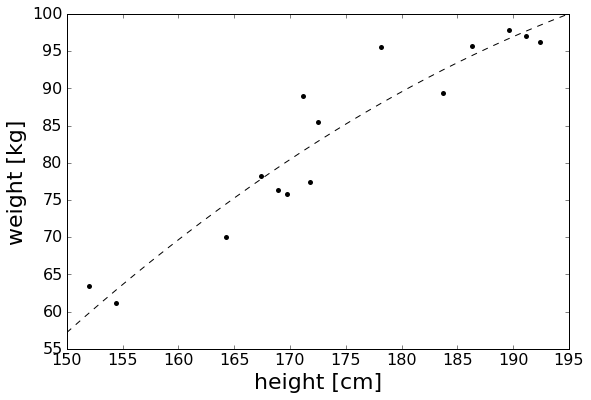

In [80]:
# Plot data and least-squares solution.
plt.figure(5, figsize=(9,6))
X = numpy.arange(150, 195, 0.1)
Y = thetaOLS[0] + thetaOLS[1]*X + thetaOLS[2]*X**2  # f(X)=a_0+a_1*x+a_2*x^2
plt.plot(X, Y, '--', lw=1, color='black')
plt.plot(HeightMale, WeightMale, 'o', ms=5, mew=0, color='black')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('height [cm]', fontsize=22)
plt.ylabel('weight [kg]', fontsize=22)

* Aside: Sometimes one has to impose positivity constraints, $\theta>0$. The $\chi^2$-minimisation then still leads to an analytic result (though iteratively). This is then called a <font color='red'>quadratic programming problem</font> (QPP).
* Practical aside: The analytic solution for the $\chi^2$ minimisation requires us to invert the matrix $D^T\cdot\Sigma^{-1}\cdot D$ (OLS has to invert $D^T\cdot D$). Therefore, we should not employ numpy's naive matrix inversion. Instead, we should employ scipy's <font color='red'>Cholesky decomposition</font>, which is numerically more stable.

In [81]:
# Use scipy's Cholesky decomposition for matrix inversion.
from scipy.linalg import cho_factor, cho_solve
cholesky = cho_factor(DtD)
thetaOLS = cho_solve(cholesky, DtY)
# Print least-squares solution.
print(thetaOLS)

[ -3.32208110e+02   3.86032600e+00  -8.42949372e-03]


### I.6 Nonlinear regression and numerical methods

* Recap: We have seen how to construct a likelihood function from the data's measurement errors. And we have seen that for Gaussian noise and linear models, we obtain nicely analytic results.
* Real-world examples rarely ever fulfill all these requirements, so what do we do in the general case?
* An analytic solution to maximise the posterior (or likelihood) may still exist occasionally, even if the model is nonlinear and/or the measurement errors are not Gaussian.
* Example: You toss a coin 13 times and you observe 2 heads. The likelihood is a binomial distribution for data $D=(n=2,N=13)$ and fraction $f=\theta$:
\begin{equation}
P(D|\theta) = \frac{n!}{N!(N-n)!}f^n (1-f)^{N-n}
\end{equation}
Take its logarithm and differentiate to find the maximum-likelihood solution for $f$:
\begin{equation}
\log P(D|\theta) = \textrm{const} + n\log f + (N-n)\log(1-f)
\end{equation}
\begin{equation}
\frac{d\log P(D|\theta)}{df} = \frac{n}{f} - \frac{N-n}{1-f} = 0
\end{equation}
\begin{equation}
0 = n(1-f) - (N-n)f = n - nf - Nf + nf = n - Nf=0
\end{equation}
This yields $f=\frac{n}{N}$.

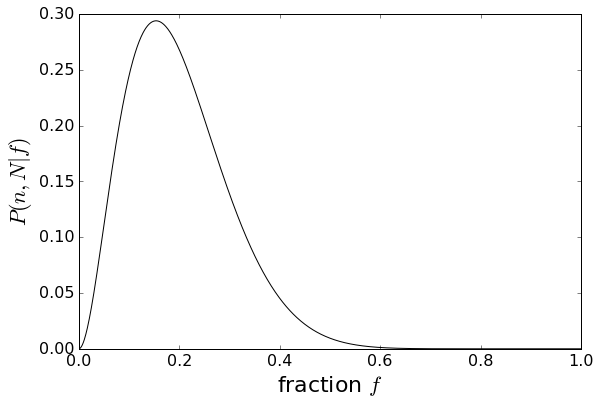

In [42]:
import scipy.special
# Compute binomial likelihood function over fraction.
n          = 2
N          = 13
Fraction   = numpy.arange(0.0, 1.0, 0.001)
Likelihood = scipy.special.binom(N, n)*numpy.power(Fraction, n)*numpy.power(1.0-Fraction, N-n)
# Plot.
plt.figure(6, figsize=(9,6))
plt.plot(Fraction, Likelihood, '-', lw=1, color='black')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'fraction $f$', fontsize=22)
plt.ylabel(r'$P(n,N|f)$', fontsize=22)

* Let $D=\{(y_n,\sigma_n)\}_{n=1}^N$ be a given data set drawn from a Cauchy distribution with width $\sigma_n$. Estimate the mean value.
* The likelihood function reads:
\begin{equation}
P(D|\mu)=\prod_{n=1}^N\frac{1}{\pi\sigma_n\left[1+\left(\frac{y_n-\mu}{\sigma_n}\right)^2\right]}
\end{equation}
And the log-likelihood is:
\begin{equation}
\log P(D|\mu)=\textrm{const}-\sum_{n=1}^N\log\left[1+\left(\frac{y_n-\mu}{\sigma_n}\right)^2\right]
\end{equation}
The gradient w.r.t. $\mu$ is:
\begin{equation}
\frac{d\log P(D|\mu)}{d\mu}=2\sum_{n=1}^N\frac{\frac{y_n-\mu}{\sigma_n^2}}{\left[1+\left(\frac{y_n-\mu}{\sigma_n}\right)^2\right]}
\end{equation}
We can equate this to zero, but we cannot solve analytically for $\mu$. Instead, we need a numerical (or graphical) solution.

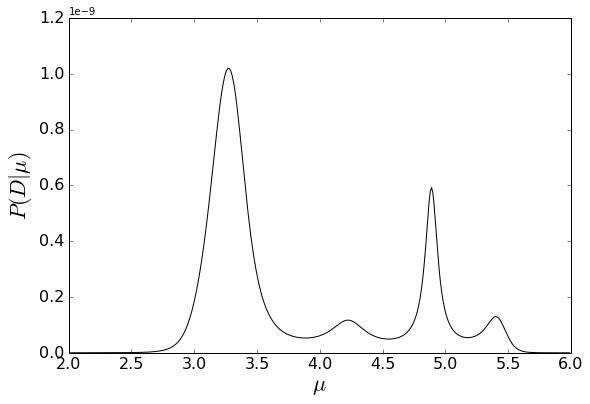

In [56]:
# Toy data for fitting mean with Cauchy noise.
Y = numpy.array([2.12, 3.21, 5.41, 5.51, 4.23, 2.99, 3.34, 4.89])
S = numpy.array([0.15, 0.22, 0.11, 0.13, 0.17, 0.23, 0.19, 0.06])
Mu         = numpy.arange(2.0, 6.0, 0.01)
Likelihood = numpy.empty(len(Mu))
for n in range(len(Mu)):
    Diff          = (Y - Mu[n])/S
    Likelihood[n] = numpy.prod(1.0/(numpy.pi*S*(1.0 + Diff**2)))
# Plot.
plt.figure(7, figsize=(9,6))
plt.plot(Mu, Likelihood, '-', lw=1, color='black')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$\mu$', fontsize=22)
plt.ylabel(r'$P(D|\mu)$', fontsize=22)

* In general, we have to resort to numerical methods in order to maximise a posterior (or likelihood).
* Some numerical methods shall be mentioned here, but due to the lack of time, we cannot go into details.
* <font color='red'>Gradient methods</font>: There is a whole family of methods using gradient ascent (for maximisation) or gradient descent (for minimisation). They are iterative algorithms and there are tools to assess their convergence. However, while gradient methods are usually quite fast, they tend to get stuck in the nearest local maximum if the posterior is multimodal.
* <font color='red'>Newton's method</font>: It not only uses the gradient (first derivative) but also the Hessian (matrix of second derivatives). Therefore, it is even faster than normal gradient methods. Evidently, it is even more prone to getting stuck in local maxima.
* If you have no more than 2 or 3 fit parameters, you can try to evaluate your likelihood/posterior on a <font color='red'>rectangular grid</font>.
* In more dimensions, you can go for a <font color='red'>random grid</font>.
* If a random grid (uniform prior) becomes inefficient, too, you can try <font color='red'>Monte-Carlo sampling</font> (a random grid with non-uniform prior).
* <font color='red'>Markov-chain Monte-Carlo</font> (MCMC) is a family of iterative algorithms that are much more efficient than Monte-Carlo sampling. However, MCMC actually is a tool for numerical integration (not maximisation) and there are no robust/reliable convergence diagnostics for MCMC. There are dozens of MCMC algorithms, but the currently best and most popular MCMC is the so-called <a href="http://arxiv.org/abs/1202.3665">EMCEE</a> since it requires no fine-tuning to produce good sampling results. Unfortunately, MCMC methods require posterior PDF, i.e., only Bayesians can use MCMC but not Frequentists.
* <font color='red'>Differential evolution</font> is a family of algorithms from the group of evolutionary algorithms. They seek to find the global maximum of the posterior (or likelihood) and are usually computationally less expensive than MCMC.

## Block II: Bayesian inference

### II.1 Overview
* <font color='red'>Bayesian inference</font> exploits basic rules of "probability calculus" (Bayes' theorem, marginalisation, etc.) to draw inference from data. This often leads to complicated integrals, which can only be evaluated numerically. Therefore, MCMC is very popular in Bayesian inference.
* Bayesian inference answers exactly the questions we are asking. But we pay for it with the choice of priors.
* <font color='red'>Marginalisation of nuisance parameters</font>. Example: You fit a circular planetary orbit, which has as model parameters the period $T$, the radius $r$, and the phase $\phi$. From Kepler's Third Law, you can then infer the mass of the host star, $\frac{T^2}{r^3}=\frac{4\pi^2}{GM}$. While you need the phase $\phi$ to let your model make predictions for the fitting, you do not need it for inferring $M$. The phase is a so-called nuisance parameter, and you want to marginalise it out:
\begin{equation}
P(T,r|D) = \int_0^{2\pi}P(T,r,\phi|D)d\phi
\end{equation}
If you do not marginalise the phase, i.e., you try to infer the mass from $P(T,r,\phi|D)$ instead of $P(T,r|D)$, then your inference is conditioned on an irrelevant parameter, which may lead you to underestimate the uncertainties in the mass.
* <font color='red'>Bayesian evidence for model comparison</font>. The Bayesian evidence $P(D)$ is widely used for model comparison, since it can be understood as "summing up" the likelihood of the data for all possible parameter values of the model:
\begin{equation}
P(D) = \int P(D,\theta)d\theta = \int P(D|\theta)P(\theta)d\theta
\end{equation}
Let's spell that out: "We sum up the likelihood of the data for all possible parameter values, weighted by how probable the parameters are a-priori."
* <font color='red'>Model prediction</font>. Let's assume we have some historical data $D$ and we want to use some model with parameters $\theta$ to predict new data $x$ for future measurements. We want $P(x|D)$. Let us introduce the model parameters via marginalisation:
\begin{equation}
P(x|D) = \int P(x,\theta|D)d\theta
\end{equation}
\begin{equation}
= \int P(x|\theta,D)P(\theta|D)d\theta
\end{equation}
\begin{equation}
= \int P(x|\theta)P(\theta|D)d\theta
\end{equation}
Let's spell that out: "The prediction of $x$ sums up likelihood contributions from all possible values of $\theta$, weighted by how probable $\theta$ is given the historical data $D$."

### II.2 Bayesian least squares
* Minimisation of $\chi^2$ is equivalent to maximisation of the likelihood $P(D|\theta)$. What would a Bayesian do instead?
* A Bayesian wants to maximise the posterior $P(\theta|D)=\frac{P(\theta)P(D|\theta)}{P(D)}$.
* We have already seen that for Gaussian noise $P(D|\theta)\propto e^{-\chi^2/2}$ and we seek to recycle the nicely analytic $\chi^2$ minimisation. We thus look at the quantity:
\begin{equation}
-2\log P(\theta|D)=\textrm{const} + \chi^2 - 2\log P(\theta)
\end{equation}
* We now choose a <font color='red'>conjugate prior</font>, i.e., a prior that has the same mathematical form as the likelihood:
\begin{equation}
P(\vec\theta)=\frac{1}{\sqrt{2\pi\det\Sigma_0}}\exp\left[-\frac{1}{2}\left(\vec\theta-\vec\theta_0\right)^T\cdot\Sigma_0^{-1}\cdot\left(\vec\theta-\vec\theta_0\right)\right]
\end{equation}
The parameters $\vec\theta_0$ and $\Sigma_0$ need to be chosen a-prior. In particular, they must not be estimated from the data.

* We obtain:
\begin{equation}
-2\log P(\theta|D)=\textrm{const} + \chi^2 + \left(\vec\theta-\vec\theta_0\right)^T\cdot\Sigma_0^{-1}\cdot\left(\vec\theta-\vec\theta_0\right)
\end{equation}
Differentiation w.r.t. $\vec\theta$ yields:
\begin{equation}
-2\vec\nabla_\theta\log P(\theta|D)= -2D^T\cdot\Sigma^{-1}\cdot\vec y
+2D^T\cdot\Sigma^{-1}\cdot D\cdot\vec\theta
-2\Sigma_0^{-1}\cdot\vec\theta_0 + 2\Sigma_0^{-1}\cdot\vec\theta
\end{equation}
If we equate this with zero and solve for $\vec\theta$, we obtain:
\begin{equation}
0= -2\left(D^T\cdot\Sigma^{-1}\cdot\vec y + \Sigma_0^{-1}\cdot\vec\theta_0 \right)
+2\left(D^T\cdot\Sigma^{-1}\cdot D + \Sigma_0^{-1}\right)\cdot\vec\theta
\end{equation}
\begin{equation}
\vec\theta_\textrm{MPE}= \left(D^T\cdot\Sigma^{-1}\cdot D + \Sigma_0^{-1}\right)^{-1}\cdot\left(D^T\cdot\Sigma^{-1}\cdot\vec y + \Sigma_0^{-1}\cdot\vec\theta_0 \right)
\end{equation}

* The solution is still analytic, because we have chosen the prior to be mathematically convenient.
* Note the impact of the prior onto the result:<br>
If $\vec\theta_0\neq 0$, then the prior will act like an additional measurement "$y_0$" and pull the solution into some direction.<br>
We now have to invert $D^T\cdot\Sigma^{-1}\cdot D + \Sigma_0^{-1}$, such that a well chosen prior can help to overcome numerical instabilities.

In [88]:
# Bayesian least squares.
# Choose the prior parameters.
theta0 = numpy.ones(3)      # theta_0 = (1,1,1) ... f(x) = 1 + x + x^2
Sigma0 = 1.0*numpy.identity(3)  # 3x3 identity matrix.
# Invert prior covariance matrix with Cholesky decomposition.
cholesky  = cho_factor(Sigma0)
Sigma0inv = cho_solve(cholesky, numpy.identity(3))
# Fit the weight as a function of the height.
# Step 1: Build the transpose of the design matrix.
N          = len(HeightMale)    # Number of training examples.
M          = 3                  # Number of fit parameter.
DesignT    = numpy.empty([M,N]) # D transposed is of format MxN.
DesignT[0] = 1.0
DesignT[1] = HeightMale
DesignT[2] = HeightMale**2
Design     = DesignT.T     # Get the design matrix from its transpose.
# Step 2: Compute least-squares solution.
DtD        = numpy.dot(DesignT,Design) + Sigma0inv
DtY        = numpy.dot(DesignT, WeightMale) + numpy.dot(Sigma0inv,theta0)
cholesky   = cho_factor(DtD)
thetaBayes = cho_solve(cholesky, DtY)
# Print least-squares solution.
print(thetaBayes)
print(thetaOLS)

[ 0.85557057  0.01340123  0.00262497]
[ -3.32208110e+02   3.86032600e+00  -8.42949372e-03]


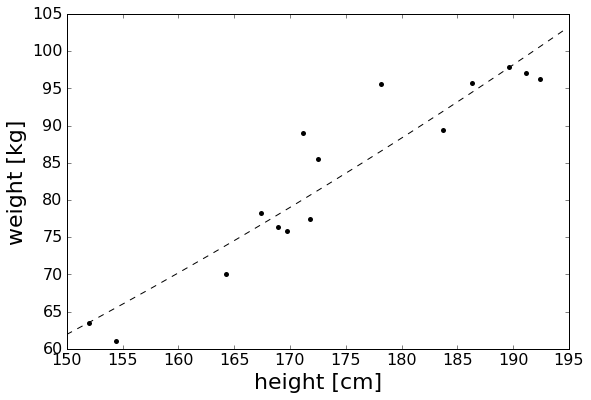

In [89]:
# Plot data and least-squares solution.
plt.figure(8, figsize=(9,6))
X = numpy.arange(150, 195, 0.1)
Y = thetaBayes[0] + thetaBayes[1]*X + thetaBayes[2]*X**2  # f(X)=a_0+a_1*x+a_2*x^2
plt.plot(X, Y, '--', lw=1, color='black')
plt.plot(HeightMale, WeightMale, 'o', ms=5, mew=0, color='black')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('height [cm]', fontsize=22)
plt.ylabel('weight [kg]', fontsize=22)

### II.3 Priors
* Such toy examples may leave the wrong impression that the choice of priors is something completely arbitrary.
* Literally, a prior encodes <font color='red'>prior knowledge</font>, which you <i>always</i> have, e.g., from previous results or a simulation of your experiment or physical insight ("distances cannot be negative", "the Higgs mass must be larger than 1eV"), etc.
* Priors are subjective choices (since prior knowledge is subjective), which is why Bayesian inference is often criticised.
* Likelihood maximisation is equivalent to posterior maximisation with a constant prior.
* A conjugate prior is mathematically convenient.
* Warning: There is <font color='red'>no such thing as an "uninformative prior"</font>. Every prior always emphasises some parameter values at the expense of others.<br>
Example uniform prior: Let $P(\theta)$ be uniform over $\theta\in[0,10]$. According to this prior, $\theta>1$ is 9x more likely than $\theta<1$.
* If the data are of high quality, the prior becomes irrelevant and the likelihood dominates the posterior.
* Opinions differ whether one should choose a "minimally informative prior" or a "highly informative prior".

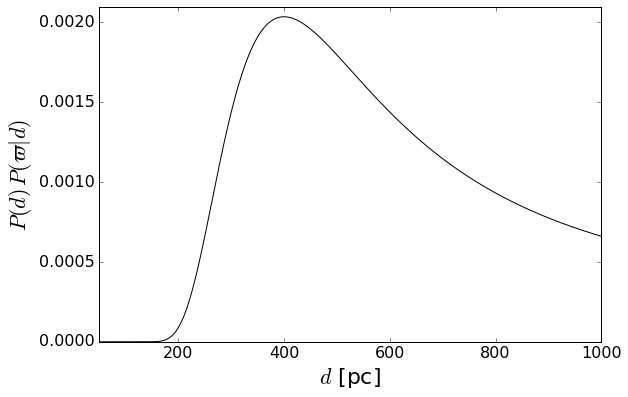

In [101]:
# Define parallax value with a poor error.
value = 2.5  # units of milli-arcsec
sigma = 1.0  # units of milli-arcsec
# Sample likelihood along parallax and distance.
Dist       = numpy.arange(0.01, 1000.0, 0.1)
Likelihood = numpy.exp(-0.5*((value-1000.0/Dist)/sigma)**2)/(sigma*numpy.sqrt(2.0*numpy.pi))
Prior      = 1.0  # Uniform prior.
#Prior      = Dist*Dist  # Uniform space density.
#Prior      = Dist*Dist*numpy.exp(-Dist/200)  # Uniform space density with exponential cut-off.
Posterior  = Prior*Likelihood
# Normalise the posterior over d=[0,1000].
# Numerical integration via trapezoidal rule.
dx        = Dist[1] - Dist[0]
norm      = dx*(numpy.sum(Posterior) - 0.5*Posterior[0] - 0.5*Posterior[-1])
Posterior = Posterior/norm
# Plot the posterior PDF.
plt.figure(9, figsize=(9,6))
plt.plot(Dist, Posterior, '-', lw=1, color='black')
plt.xlim(50,1000)
plt.ylim(0, 1.03*numpy.max(Posterior))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$d$ [pc]', fontsize=22)
plt.ylabel(r'$P(d)\,P(\varpi|d)$', fontsize=22)

### II.4 Worked example: Inferring intrinsic distance distribution
* Example: Given the set of observed TGAS parallaxes and their errors, we want to infer the intrinsic distance distribution of TGAS stars, $P(d|\theta)$.
* First, using $\varpi=\frac{1000}{d}$ or $d=\frac{1000}{\varpi}$, we transform the intrinsic distance distribution to an intrinsic parallax distribution:
\begin{equation}
P(\varpi|\theta)=P(d|\theta)\left |\frac{\textrm{d}d}{\textrm{d}\varpi}\right |
=\frac{1000}{\varpi^2}P\left(\left.\frac{1000}{\varpi}\right|\theta\right)
\end{equation}

* Second, the real TGAS parallaxes are subject to measurement noise, i.e., the intrinsic parallax distribution is not directly observable. The probability of an observed parallax, $\varpi_\textrm{obs}$, will obviously depend on the Gaussian error $\sigma$ and on $\theta$, i.e., we are looking for $P(\varpi_\textrm{obs}|\theta,\sigma)$. We have to marginalise over the unknown intrinsic parallax:
\begin{equation}
P(\varpi_\textrm{obs}|\theta,\sigma)=\int_0^\infty\textrm{d}\varpi\,P(\varpi_\textrm{obs},\varpi|\theta,\sigma)
\end{equation}
\begin{equation}
\phantom{P(\varpi_\textrm{obs}|\theta,\sigma)}
=\int_0^\infty\textrm{d}\varpi\,P(\varpi_\textrm{obs}|\varpi,\theta,\sigma)\,P(\varpi|\theta,\sigma)
\end{equation}
\begin{equation}
\phantom{P(\varpi_\textrm{obs}|\theta,\sigma)}
=\int_0^\infty\textrm{d}\varpi\,P(\varpi_\textrm{obs}|\varpi,\sigma)\,P(\varpi|\theta)
\end{equation}
The intrinsic parallax distribution, $P(\varpi|\theta)$ obviously acts as a prior in this marginalisation.

* Plug in the Gaussian noise distribution:
\begin{equation}
P(\varpi_\textrm{obs}|\theta,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}\int_0^\infty\textrm{d}\varpi \exp\left[-\frac{1}{2}\left(\frac{\varpi_\textrm{obs}-\varpi}{\sigma}\right)^2\right] P(\varpi|\theta)
\,\textrm{.}
\end{equation}

* Finally, we can now define the likelihood function of the TGAS parallaxes:
\begin{equation}
P(D|\theta)=\prod_{n=1}^N P(\varpi_{\textrm{obs},n}|\theta,\sigma_n)
\end{equation}
Note that his likelihood contains one numerical integral per star.

### II.5 Data with errors on both axes
* Fitting data with errors on both axes - the Bayesian approach: We have a model $f(\vec x|\theta)$ that predicts the label $y$. However, the given labelled training data now has not only errors on $y$ but also on $\vec x$.
* There are several methods that fudge a solution but which run into problems, e.g., if the errors on $\vec x$ and $y$ are correlated. The Bayesian solution is wholly general ... but computationally expensive and relying on priors.
* As usual, we set out from the likelihood of the data given the model parameters, $P(\vec x,y|\theta)$. The model predicts the <i>true</i> label $y_T$ from the <i>true</i> position $\vec x_T$. So let us introduce these true values via marginalisation:
\begin{equation}
P(\vec x,y|\theta)=\int dy_T\int d\vec x_T\,P(\vec x,y,\vec x_T,y_T|\theta)
\end{equation}
\begin{equation}
\phantom{P(\vec x,y|\theta)}
=\int dy_T\int d\vec x_T\,P(\vec x,y|\vec x_T,y_T,\theta)\,P(\vec x_T,y_T|\theta)
\end{equation}
Once we have the true values $\vec x_T$ and $y_T$, the observed values $\vec x$ and $y$ no longer depend on the model parameters $\theta$, such that we can reduce $P(\vec x,y|\vec x_T,y_T,\theta)=P(\vec x,y|\vec x_T,y_T)$ and are left with:
\begin{equation}
P(\vec x,y|\theta)
=\int dy_T\int d\vec x_T\,P(\vec x,y|\vec x_T,y_T)\,P(\vec x_T,y_T|\theta)
\end{equation}
\begin{equation}
\phantom{P(\vec x,y|\theta)}
=\int dy_T\int d\vec x_T\,P(\vec x,y|\vec x_T,y_T)\,P(y_T|\vec x_T,\theta)\,P(\vec x_T|\theta)
\end{equation}
Next, our model $f(\vec x|\theta)$ usually (not always) makes a <i>deterministic</i> prediction of $y$, such that we can write $P(y_T|\vec x_T,\theta)=\delta\left(y_T-f(\vec x_T|\theta)\right)$ and thus one integral is trivial:
\begin{equation}
P(\vec x,y|\theta)
=\int d\vec x_T\,P(\vec x,y|\vec x_T,f(\vec x_T|\theta))\,P(\vec x_T|\theta)
\end{equation}
The prior $P(\vec x_T|\theta)$ needs to be chosen, e.g., uniform over some interval in feature space.
* This requires an integration for <i>every</i> training data point. If we are lucky, this integration has an analytic solution. Otherwise, this will become computationally very expensive and will only be feasible for small data sets.

### II.6 Sampling methods
* Bayesian inference involves numerical integration.
* In 1D, integrating a function $f(x)$ with the trapezoidal rule has an error that scales with $(\Delta x)^2\max|f^{\prime\prime}(x)|$. For multiple integrals (higher dimensions) you need a high-dimensional grid. For $S$ grid steps in $D$ dimensions, you need $S^D$ grid points.
* In higher dimensions, it is more efficient to draw random samples from the distribution, $\{\theta_s\}_{s=1}^S\sim P(\theta)$, from which you can estimate, e.g., expectation values:
\begin{equation}
\langle f\rangle = \int f(\theta)\,P(\theta)d\theta\approx\frac{1}{S}\sum_{s=1}^S f(\theta_s)
\qquad\textrm{where}\qquad \theta_s\sim P(\theta)
\end{equation}
The crucial point is that the error of such estimates
\begin{equation}
\sigma_f = \sqrt{\frac{1}{S-1}\sum_{s=1}^S\left(f(\theta_s) - \langle f\rangle\right)^2}
\end{equation}
<i>always</i> scales as $\frac{1}{\sqrt{S}}$ for large $S$, regardless of how many dimensions we are integrating. Therefore, as the dimensionality increases, sampling quickly becomes more efficient than, e.g., the trapezoidal rule.
* There are different methods for <font color='red'>Monte Carlo sampling</font>, e.g., importance sampling and rejection sampling.
* However, Monte-Carlo sampling itself is not always efficient, since it often draws from regions of low probability. Instead, <font color='red'>Markov chain Monte Carlo</font> (MCMC) sampling draws samples that are <i>correlated</i> and therefore can remember what the previous sample did accomplish and then try to find parameter values with higher posterior probability.

In [11]:
# Let us define a Gaussian distribution via its mean and standard deviation.
mean  = 2.000
sigma = 1.000
# Let us draw 1000 random samples.
numpy.random.seed(1)
x = numpy.random.normal(mean, sigma, 1000)
# Let us estimate the mean and the standard deviation from the samples.
print numpy.mean(x)
print numpy.std(x)

2.03881247616
0.981004133932


## Block III: Some useful methods

### III.1 Linear Discriminant Analysis (LDA)
* LDA is a probabilistic two-class classification method that invokes strong assumptions in order to obtain an analytic solution.
* The two classes have labels $y=(-1,1)$ and are assumed to be Gaussian in feature space:
\begin{equation}
P(\vec x|y=-1) = \frac{1}{(2\pi)^{D/2}\sqrt{\det\Sigma_{-1}}}\exp\left[-\frac{1}{2}\left(\vec x-\vec\mu_{-1}\right)^T\cdot\Sigma_{-1}^{-1}\cdot\left(\vec x-\vec\mu_{-1}\right)\right]
\end{equation}
\begin{equation}
P(\vec x|y=1) = \frac{1}{(2\pi)^{D/2}\sqrt{\det\Sigma_1}}\exp\left[-\frac{1}{2}\left(\vec x-\vec\mu_1\right)^T\cdot\Sigma_1^{-1}\cdot\left(\vec x-\vec\mu_1\right)\right]
\end{equation}
* To classify a feature $\vec x$, you take the maximum probability of $P(\vec x|y=-1)$ and $P(\vec x|y=1)$.
* Training is trivial: You estimate the mean vectors $\vec\mu_{-1}$ and $\vec\mu_1$ from the two separate training sets. Likewise, you estimate the covariance matrices $\Sigma_{-1}$ and $\Sigma_1$ from the two clases separately, or from both combined if you impose $\Sigma=\Sigma_{-1}=\Sigma_1$.
* The <font color='red'>decision boundary</font> occurs at $P(\vec x|y=-1)=P(\vec x|y=1)$, such that in logarithm, we obtain:
\begin{equation}
\log\det\Sigma_{-1} + \left(\vec x-\vec\mu_{-1}\right)^T\cdot\Sigma_{-1}^{-1}\cdot\left(\vec x-\vec\mu_{-1}\right)
= \log\det\Sigma_1 + \left(\vec x-\vec\mu_1\right)^T\cdot\Sigma_1^{-1}\cdot\left(\vec x-\vec\mu_1\right)
\end{equation}
* If we assume that both classes have identical covariance matrices, $\Sigma=\Sigma_{-1}=\Sigma_1$, this reduces to:
\begin{equation}
\left(\vec x-\vec\mu_{-1}\right)^T\cdot\Sigma^{-1}\cdot\left(\vec x-\vec\mu_{-1}\right)
= \left(\vec x-\vec\mu_1\right)^T\cdot\Sigma^{-1}\cdot\left(\vec x-\vec\mu_1\right)
\end{equation}

\begin{equation}
\vec x^T\cdot\Sigma^{-1}\cdot\vec x - 2\vec\mu_{-1}^T\cdot\Sigma^{-1}\cdot\vec x + \vec\mu_{-1}^T\cdot\Sigma^{-1}\cdot\vec\mu_{-1}=
\vec x^T\cdot\Sigma^{-1}\cdot\vec x - 2\vec\mu_1^T\cdot\Sigma^{-1}\cdot\vec x + \vec\mu_1^T\cdot\Sigma^{-1}\cdot\vec\mu_1
\end{equation}

\begin{equation}
- 2\vec\mu_{-1}^T\cdot\Sigma^{-1}\cdot\vec x + \vec\mu_{-1}^T\cdot\Sigma^{-1}\cdot\vec\mu_{-1}=
- 2\vec\mu_1^T\cdot\Sigma^{-1}\cdot\vec x + \vec\mu_1^T\cdot\Sigma^{-1}\cdot\vec\mu_1
\end{equation}

\begin{equation}
2\left(\vec\mu_1 - \vec\mu_{-1}\right)^T\cdot\Sigma^{-1}\cdot\vec x=
\vec\mu_1^T\cdot\Sigma^{-1}\cdot\vec\mu_1 - \vec\mu_{-1}^T\cdot\Sigma^{-1}\cdot\vec\mu_{-1}
\end{equation}
* That decision boundary has the mathematical form of a straight line $\vec b^T\cdot\vec x=a$, with $\vec b=2\Sigma^{-1}\cdot\left(\vec\mu_1 - \vec\mu_{-1}\right)$ and $a=\vec\mu_1^T\cdot\Sigma^{-1}\cdot\vec\mu_1 - \vec\mu_{-1}^T\cdot\Sigma^{-1}\cdot\vec\mu_{-1}$. That is why this is called LDA.
* If we write out $b_1 x_1+b_2 x_2=a$, we get the straight-line decision boundary as:
\begin{equation}
x_2 = \frac{a-b_1 x_1}{b_2}
\end{equation}
* If we had allowed $\Sigma_{-1}\neq\Sigma_1$, the decision boundary would be a parabolic curve (<font color='red'>Quadratic Discriminant Analysis</font>).

-50.0966599409 0.724965032414


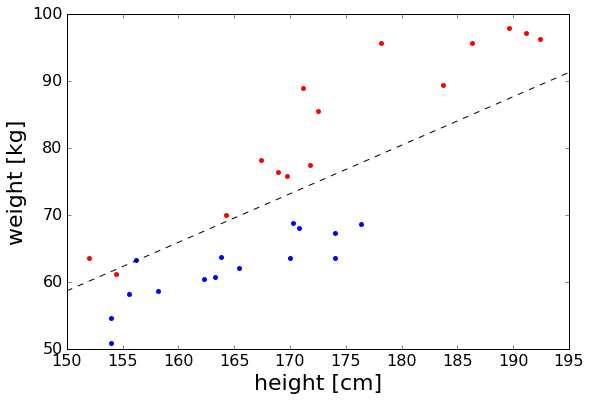

In [115]:
# Use heights and weights of men and women.
# Train LDA.
# Compute mean vector of women and men.
muF = numpy.array([numpy.mean(HeightFemale), numpy.mean(WeightFemale)])
muM = numpy.array([numpy.mean(HeightMale),   numpy.mean(WeightMale)])
# Compute covariance matrix of joint training data.
Features = numpy.array([numpy.concatenate((HeightFemale,HeightMale)),
                        numpy.concatenate((WeightFemale,WeightMale))])
Sigma = numpy.cov(Features)
# Invert covariance matrix the quick-and-dirty way (for more complex data use Cholesky decomposition instead):
SigmaInv = numpy.linalg.inv(Sigma)
# Compute slope b and intercept a.
b = 2.0*numpy.dot(SigmaInv, muF - muM)
a = numpy.dot(muF, numpy.dot(SigmaInv, muF)) - numpy.dot(muM, numpy.dot(SigmaInv, muM))
# Plot two classes.
plt.figure(10, figsize=(9,6))
plt.plot(HeightMale,   WeightMale,   'o', ms=5, mew=0, color='red')
plt.plot(HeightFemale, WeightFemale, 'o', ms=5, mew=0, color='blue')
# Overplot decision boundary.
a_0 =  a/b[1]
a_1 = -b[0]/b[1]
print a_0,a_1
plt.plot([150,195], [a_0 + a_1*150,a_0 + a_1*195], '--', lw=1, color='black')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('height [cm]', fontsize=22)
plt.ylabel('weight [kg]', fontsize=22)

### III.2 Logistic Regression
* <font color='red'>Logistic regression</font> (a.k.a. logit regression) is primarily used for two-class classification problems, where the class labels are $y=\pm 1$. Logistic regression can be understood as the building block of a neural network classifier.
* For a feature vector $\vec x$, logistic regression predicts the class label by using the sigmoid function:
\begin{equation}
f(\vec x|\vec\theta) = 1-\frac{2}{1+\exp\left[\vec x\cdot\vec\theta\right]}\in(-1,1)
\end{equation}

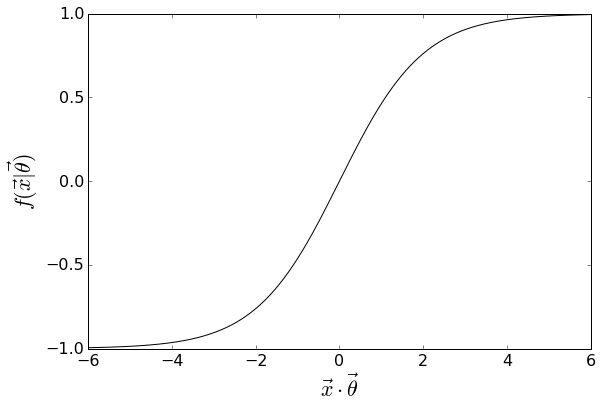

In [116]:
# Evaluate the sigmoid function.
XxTheta = numpy.arange(-6.0, 6.0, 0.01)
Sigmoid = 1.0 - 2.0/(1.0 + numpy.exp(XxTheta))
# Plot the sigmoid function.
plt.figure(11, figsize=(9,6))
plt.plot(XxTheta, Sigmoid, '-', lw=1, color='black')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$\vec x\cdot\vec\theta$', fontsize=22)
plt.ylabel(r'$f(\vec x|\vec\theta)$', fontsize=22)

* The decision boundary is given by $f(\vec x|\vec\theta)=1-\frac{2}{1+\exp\left[\vec x\cdot\vec\theta\right]}=0$, which occurs at $\vec x\cdot\vec\theta=0$, which looks like a straight line again.
* One often adds a "dummy feature" such that $\vec x=(1,x_1,x_2,x_3,\ldots,x_D)^T$, which gives the model more flexibility.

* For a given labelled training data set $D=\{\vec x_n,y_n\}_{n=1}^N$, one often chooses to maximise the objective function (<i>not</i> a loss function):
\begin{equation}
L(\vec\theta) = \sum_{n=1}^N \log\left(1+y_n\,f(\vec x_n|\vec\theta)\right) - \frac{\lambda}{2}\vec\theta\cdot\vec\theta
\end{equation}
While we can interpret the second term as the logarithm of a Gaussian prior, the first term is no reasonable (log) likelihood. A single-point log-likelihood of $\log\left(1+y\,f(\vec x|\vec\theta)\right)$ would correspond to a single-point likelihood of $P(y|\vec\theta)\propto 1+y\,f(\vec x|\vec\theta)$. While we can certainly normalise it such that $\int_{-1}^1 P(y|\vec\theta)dy=1$, what kind of measurement process should produce a PDF of such a mathematical form? We are back at engineering!

* Unfortunately, the objective function $L(\vec\theta)$ cannot be maximised analytically. However, the logistic regression model belongs to the family of so-called <font color='red'>generalised linear models</font> (GLM). While GLMs usually have no analytic solution for their best-fit parameters, they retain the very important property that their objective function still has only a single global maximum.

* Since logisitic regression is a GLM, we can safely employ Newton's method (gradient and Hessian) to maximise $L(\vec\theta)$.
* For the objective function of logistic regression, we can actually compute gradient and Hessian analytically. However, this is tedious and offers nothing of interest.
* Instead, we will estimate gradient and Hessian <i>numerically</i>, which is not necessary (or recommended) in this case, but from which we can learn how to do it if gradient and/or Hessian do not exist analytically.
* For some small value of $h$, we can approximate the gradient via the <font color='red'>two-point approximation</font>:
\begin{equation}
\frac{df(x)}{dx}\approx\frac{f(x+h)-f(x-h)}{2h}
\end{equation}
The error of this estimate scales as $\mathcal O(h^2)$. If that is not good enough and we are willing to invest twice as much computation time, we can use the <font color='red'>four-point approximation</font>:
\begin{equation}
\frac{df(x)}{dx}\approx\frac{-f(x+2h)+8f(x+h)-8f(x-h)+f(x-2h)}{12h}
\end{equation}
Its error scales as $\mathcal O(h^4)$.
* For the Hessian, we can numerically estimate the diagonal elements as:
\begin{equation}
\frac{\partial^2 f(\vec x)}{\partial x_i^2}\approx\frac{f(x_i+h)-2f(x_i)+f(x_i-h)}{h^2}
\end{equation}
And the off-diagonal elements as:
\begin{equation}
\frac{\partial^2 f(\vec x)}{\partial x_i\partial x_j}\approx
\frac{f(x_i+h,x_j+h)-f(x_i+h,x_j)-f(x_i,x_j+h)+2f(x_i,x_j)-f(x_i-h,x_j)-f(x_i,x_j-h)+f(x_i-h,x_j-h)}{2h^2}
\end{equation}
* From some initial guess $\vec\theta_0$, Newton's method then iterates:
\begin{equation}
\vec\theta_{i+1} = \vec\theta_i - H^{-1}\cdot\vec\nabla L(\vec\theta_i)
\end{equation}
Usually, one chooses $\vec\theta_0=0$ as initial guess.
* Newton's method often tends to overshoot, especially if $h$ is too large. One thus introduces $\eta<1$ such that:
\begin{equation}
\vec\theta_{i+1} = \vec\theta_i - \eta H^{-1}\cdot\vec\nabla L(\vec\theta_i)
\end{equation}
You can try to fine-tune $\eta$, but usually $\eta=0.01$ just works fine.

In [119]:
import copy
# Define feature matrix.
Features = numpy.transpose([numpy.concatenate((numpy.ones(15),numpy.ones(15))),  # dummy feature
                            numpy.concatenate((HeightFemale,HeightMale)),        # height feature
                            numpy.concatenate((WeightFemale,WeightMale))])       # weight feature
# Define label vector.
Labels = numpy.concatenate((numpy.ones(15),-numpy.ones(15)))
# Define evaluation of loss function.
def getLoss(theta, l):
    # Evaluate prediction by logistic function for all training vectors.
    Prediction = 1.0 - 2.0/(1.0 + numpy.exp(numpy.dot(Features,theta)))
    # Evaluate loss function.
    loss = -0.5*l*numpy.dot(theta,theta)  # the "prior"
    loss = loss + numpy.sum(numpy.log(1.0 + numpy.dot(Labels, Prediction)))
    return loss
# As initial guess choose [0,0,0].
D     = 3
theta = numpy.zeros(D)
l     = 10.0
# Print loss of initial guess.
print "iteration 0: \t"+str(getLoss(theta, l))
# Choose stepsize parameter.
h = 1.0e-6
# Iterate Newton's method for 20 iterations.
for i in range(20):
    # First, estimate the gradient for all three fit parameters.
    Gradient = numpy.empty(D)
    for d in range(D):
        theta_1     = copy.copy(theta)
        theta_2     = copy.copy(theta)
        theta_1[d]  = theta[d] + h
        theta_2[d]  = theta[d] - h
        Gradient[d] = (getLoss(theta_1, l) - getLoss(theta_2, l))/(2.0*h)
    # Second, estimate diagonal elements of Hessian.
    Hessian = numpy.empty([D,D])
    for d in range(D):
        theta_1      = copy.copy(theta)
        theta_2      = copy.copy(theta)
        theta_1[d]   = theta[d] + h
        theta_2[d]   = theta[d] - h
        Hessian[d,d] = (getLoss(theta_1, l) - 2.0*getLoss(theta, l) + getLoss(theta_2, l))/(h*h)
    # Third, estimate off-diagonal elements of Hessian.
    for d1 in range(D):
        for d2 in range(d1):
            theta_1     = copy.copy(theta)
            theta_1[d1] = theta[d1] + h
            theta_1[d2] = theta[d2] + h
            lossPP      = getLoss(theta_1, l)  # f(x_i+h,x_j+h)
            theta_1     = copy.copy(theta)
            theta_1[d1] = theta[d1] + h
            lossP0      = getLoss(theta_1, l)  # f(x_i+h,x_j)
            theta_1     = copy.copy(theta)
            theta_1[d2] = theta[d2] + h
            loss0P      = getLoss(theta_1, l)  # f(x_i,x_j+h)
            loss00      = getLoss(theta, l)    # f(x_i,x_j)
            theta_1     = copy.copy(theta)
            theta_1[d1] = theta[d1] - h
            lossM0      = getLoss(theta_1, l)  # f(x_i-h,x_j)
            theta_1     = copy.copy(theta)
            theta_1[d2] = theta[d2] - h
            loss0M      = getLoss(theta_1, l)  # f(x_i,x_j-h)
            theta_1     = copy.copy(theta)
            theta_1[d1] = theta[d1] - h
            theta_1[d2] = theta[d2] - h
            lossMM      = getLoss(theta_1, l)  # f(x_i-h,x_j-h)
            Hessian[d1,d2] = (lossPP - lossP0 - loss0P + 2.0*loss00 - lossM0 - loss0M + lossMM)/(2.0*h*h)
            Hessian[d2,d1] = Hessian[d1,d2]  # The Hessian is symmetric.
    # Fourth, invert the Hessian and update the parameters.
    # The Hessian (or its numerical estimate) is not necessarily positive definite. So no Cholesky decomposition.
    Hinv  = numpy.linalg.inv(Hessian)
    theta = theta - 0.01*numpy.dot(Hinv, Gradient)
    # Print loss after iteration step is complete.
    print "iteration "+str(i+1)+": \t"+str(getLoss(theta, l))

iteration 0: 	0.0
iteration 1: 	0.00994688661511
iteration 2: 	0.0199107974104
iteration 3: 	0.0298523192318
iteration 4: 	0.039792898455
iteration 5: 	0.0497326193177
iteration 6: 	0.0596714725629
iteration 7: 	0.0696094373171
iteration 8: 	0.0795464901704
iteration 9: 	0.0894826127632
iteration 10: 	0.0994177743598
iteration 11: 	0.10935194936
iteration 12: 	0.119285115236
iteration 13: 	0.129217240731
iteration 14: 	0.139148301177
iteration 15: 	0.14907826879
iteration 16: 	0.159007114748
iteration 17: 	0.168934807575
iteration 18: 	0.178861319776
iteration 19: 	0.188786620373
iteration 20: 	0.198710676449


* Once we have the parameters $\vec\theta=(\theta_0,\theta_1,\theta_2)^T$, we can compute the decision boundary from $\vec\theta\cdot\vec x=0$:
\begin{equation}
\theta_0+\theta_1 x_1+\theta_2 x_2=0
\qquad\Longrightarrow\qquad
x_2 = -\frac{\theta_0+\theta_1 x_1}{\theta_2}
\end{equation}

0.0057474799777 0.433251394989


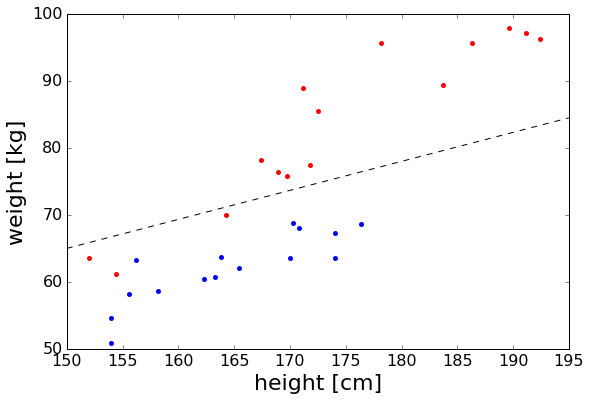

In [120]:
# Plot two classes.
plt.figure(12, figsize=(9,6))
plt.plot(HeightMale,   WeightMale,   'o', ms=5, mew=0, color='red')
plt.plot(HeightFemale, WeightFemale, 'o', ms=5, mew=0, color='blue')
# Overplot decision boundary.
a_0 = -theta[0]/theta[2]
a_1 = -theta[1]/theta[2]
print a_0,a_1
plt.plot([150,195], [a_0 + a_1*150,a_0 + a_1*195], '--', lw=1, color='black')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('height [cm]', fontsize=22)
plt.ylabel('weight [kg]', fontsize=22)

### III.3 Locally Estimated Scatterplot Smoothing (LOESS)
* So far, $f(\vec x|\theta)$ always was an explicit model with some parameters $\theta$, e.g., a straight line or a polynomial.
* New context: You have data and want to find some function that fits it. All you want is to evaluate that function at any location. You do <i>not</i> care to choose any special form for that function. This is called a <font color='red'>nonparametric model</font>.
* Aside: That sounds very much like engineering. However, even in science, such situations can arise. For example, you want to interpolate stellar spectra over a grid of effective temperatures.
* At each evaluation point LOESS fits a low-order polynomial to the given data in the neighbourhood, using a weighted least-squares.
* You are given labelled training data $D=\{(x_n,y_n)\}_{n=1}^N$ and you want to evaluate the model function $f(x)$ at some location $x$ (e.g., many locations to produce a plot of $f(x)$). At <i>every</i> $x$, you fit a low-order polynomial, e.g., a straight line, by minimising:
\begin{equation}
L=\sum_{n=1}^N K(x,x_n)\left(y_n-a_0-a_1 x_n\right)^2
\end{equation}
$K(x,x_n)$ is some chosen kernel function, e.g., an Epanechnikov kernel. It <i>suppresses</i> the contribution of training examples $x_n$ which are too far away from the location $x$ that we care about ("locally weighted").
* Let us introduce the diagonal weight matrix $W=\textrm{diag}(K(x,x_1),K(x,x_2),\ldots,K(x,x_N))$ and rewrite the loss function using the design matrix of a straight line
\begin{equation}
D=\left(\begin{array}{cc}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{array}\right)
\end{equation}
and parameters $\vec\theta$:
\begin{equation}
L=\left(\vec y - D\cdot\vec\theta\right)^T\cdot W\cdot\left(\vec y - D\cdot\vec\theta\right)
\end{equation}
Evidently, the weight matrix $W$ of the kernel acts like an inverse covariance matrix. We can thus recycle the analytic least-squares solution that we obtained earlier:
\begin{equation}
\hat{\vec\theta} = \left(D^T\cdot W\cdot D\right)^{-1}\cdot D^T\cdot W\cdot\vec y
\end{equation}
The prediction at location $x$ is thus $f(x|\vec\theta)=\theta_0+\theta_1 x$.
* Note that we have to keep the training data in memory to make predictions. It is <i>not</i> like you only need the training data to get best-fit parameter values and then these were sufficient to make predictions.

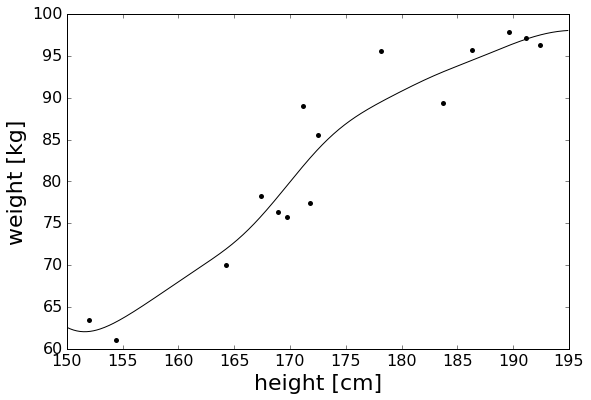

In [126]:
# Fit the weight as a function of the height using LOESS with 1st-order polynomial.
# Step 1: Build the transpose of the design matrix.
N          = len(HeightMale)    # Number of training examples.
DesignT    = numpy.empty([2,N]) # D transposed is of format MxN.
DesignT[0] = 1.0
DesignT[1] = HeightMale
Design     = DesignT.T     # Get the design matrix from its transpose.
# Step 2: Compute model prediction with LOESS.
X = numpy.arange(150, 195, 0.1)
S = len(X)
Y = numpy.empty(S)
for s in range(S):
    # Evaluate kernel function for given x and training data.
    x   = X[s]
    Dev = (HeightMale - x)/5.0
    K   = numpy.exp(-0.5*Dev*Dev) # Gaussian kernel
    # Build weight matrix.
    W = numpy.diag(K)
    # Get weighted least-squares solution.
    DtWD     = numpy.dot(DesignT, numpy.dot(W, Design))
    DtWY     = numpy.dot(DesignT, numpy.dot(W, WeightMale))
    cholesky = cho_factor(DtWD)
    thetaOLS = cho_solve(cholesky, DtWY)
    # Make prediction at position x.
    Y[s] = thetaOLS[0] + thetaOLS[1]*x
# Plot data and least-squares solution.
plt.figure(13, figsize=(9,6))
plt.plot(X, Y, '-', lw=1, color='black')
plt.plot(HeightMale, WeightMale, 'o', ms=5, mew=0, color='black')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('height [cm]', fontsize=22)
plt.ylabel('weight [kg]', fontsize=22)

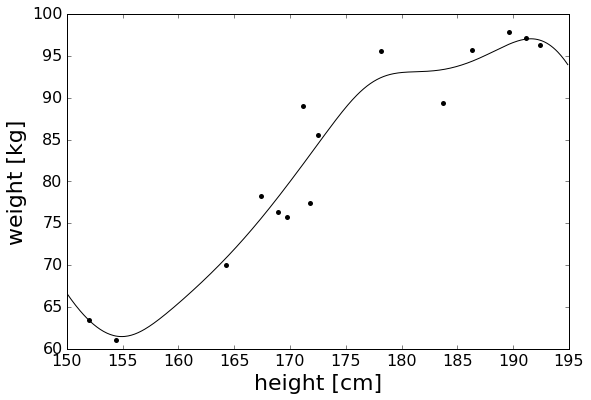

In [131]:
# Fit the weight as a function of the height using LOESS with 2nd-order polynomial.
# Step 1: Build the transpose of the design matrix.
N          = len(HeightMale)    # Number of training examples.
DesignT    = numpy.empty([3,N]) # D transposed is of format MxN.
DesignT[0] = 1.0
DesignT[1] = HeightMale
DesignT[2] = HeightMale**2
Design     = DesignT.T     # Get the design matrix from its transpose.
# Step 2: Compute model prediction with LOESS.
X = numpy.arange(150, 195, 0.1)
S = len(X)
Y = numpy.empty(S)
for s in range(S):
    # Evaluate kernel function for given x and training data.
    x   = X[s]
    Dev = (HeightMale - x)/5.0
    K   = numpy.exp(-0.5*Dev*Dev) # Gaussian kernel
    # Build weight matrix.
    W = numpy.diag(K)
    # Get weighted least-squares solution.
    DtWD     = numpy.dot(DesignT, numpy.dot(W, Design))
    DtWY     = numpy.dot(DesignT, numpy.dot(W, WeightMale))
    cholesky = cho_factor(DtWD)
    thetaOLS = cho_solve(cholesky, DtWY)
    # Make prediction at position x.
    Y[s] = thetaOLS[0] + thetaOLS[1]*x + thetaOLS[2]*x*x
# Plot data and least-squares solution.
plt.figure(14, figsize=(9,6))
plt.plot(X, Y, '-', lw=1, color='black')
plt.plot(HeightMale, WeightMale, 'o', ms=5, mew=0, color='black')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('height [cm]', fontsize=22)
plt.ylabel('weight [kg]', fontsize=22)

## Block IV: Support Vector Machines (SVM)

### IV.1 Motivation
* In 1980s and early 1990s, neural networks caused a real hype but high-flying expectations were deeply disappointed.
* Vapnik and Chervonenkis ("VC") set out to formulate a learning paradigm (<font color='red'>VC theory</font>) from scratch, based on mathematics instead of heuristics.
* VC theory builds an understanding of what works, how it works, why it works and under what conditions it works.
* VC theory will tell us which models are good and which are bad ones.
* VC theory will show us how to train good models with little training data in high-dimensional parameter spaces.
* VC theory will give us the "holy grail" of data analysis: It will allow us to minimise the <i>test</i> error by minimising the <i>training</i> error.
* Finally, VC theory will give us an algorithm that implements all of this: <font color='red'>Support Vector Machine</font> (SVM)

### IV.2 Risk functional and empirical risk minimisation
* Let us return to loss functions, $L(y,f(\vec x|\theta))$, e.g., squared-error loss for regression or zero-one loss for classification.
* Let $P(\vec x,y)$ denote the probability distribution for creating data, such as training data samples or test data samples. We then define the <font color='red'>risk functional</font> as the expectation value of the loss:
\begin{equation}
R(\theta)=\int L(y,f(\vec x|\theta))\,P(\vec x,y)\,d(\vec x,y)
\end{equation}
* This risk function measures the <i>true</i> error of the model. We may also call it the <font color='red'>test error</font>.
* We cannot minimise $R(\theta)$ directly. However, for some given labelled training data $D=\{(x_n,y_n)\}_{n=1}^N$, we can minimise the <font color='red'>empirical risk</font>:
\begin{equation}
R_\textrm{emp}(\theta)=\frac{1}{N}\sum_{n=1}^NL(y_n,f(\vec x_n|\theta))
\end{equation}
This is nothing else than the expected loss that we saw earlier. We may also call this the <font color='red'>training error</font>.
* Minimising the training error (a.k.a. empirical risk) is known as <font color='red'>empirical risk minimisation</font>.
* The test error is <i>always</i> larger than the training error. $R(\theta)-R_\textrm{emp}(\theta)>0$ is called the <font color='red'>generalisation error</font>.

* Two questions arise immediately:<br>
(1) Does minimising the training error always give us a "good model" with low test error?<br>
(2) How much training data $N$ do we need to get a "good model" with low test error?
* Let us consider the following, seemingly harmless three-parameter model:
\begin{equation}
f(x) = a\cos(kx+\phi)
\end{equation}
For example, this model is used to describe circular orbits of exoplanets.
* With only three parameters, this model can fit <i>any</i> training data set <i>perfectly</i>, regardless how many data points $N$ it contains. (The only condition is that no two training points have identical $x$-values.) The trick is to make the period $k$ larger and larger, such that $f(x)$ oscillates quickly enough to reach every point.

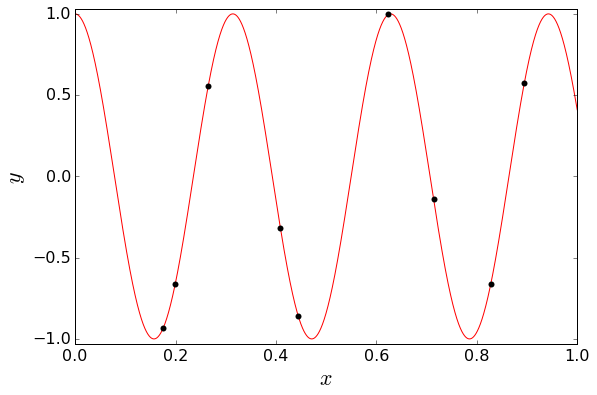

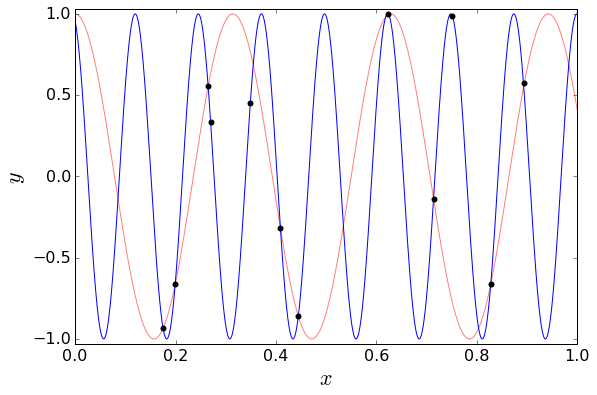

In [110]:
# Toy data to illustrate infinite complexity of cosine model.
Xcos = [0.1752,0.1994,0.265,0.4089,0.4445,0.6241,0.7138,0.8278,0.8933]
Ycos = [-0.93504607,-0.66267797,0.55437434,-0.31837839,-0.86038181,0.99644291,-0.1383875,-0.66145684,0.5716585]
# Plot data and cosine function.
plt.figure(16, figsize=(9,6))
X  = numpy.arange(0.0, 1.0, 0.0001)
Y1 = numpy.cos(20.0*X)
plt.plot(X, Y1, '-', lw=1, color='red')
plt.plot(Xcos, Ycos, 'o', ms=6, mew=0, color='black')
plt.ylim(-1.03,1.03)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$x$', fontsize=22)
plt.ylabel(r'$y$', fontsize=22)
# Add a few more points.
Xcos2 = numpy.concatenate((Xcos, [0.75094243,0.34889834,0.26992789]))
Ycos2 = numpy.concatenate((Ycos, [0.98906652,0.4494571,0.33421513]))
plt.figure(17, figsize=(9,6))
X  = numpy.arange(0.0, 1.0, 0.0001)
Y1 = numpy.cos(20.0*X)
Y2 = numpy.cos(50.0*X+0.3)
plt.plot(X, Y1, '-', lw=1, color='red', alpha=0.5)
plt.plot(X, Y2, '-', lw=1, color='blue')
plt.plot(Xcos2, Ycos2, 'o', ms=6, mew=0, color='black')
plt.ylim(-1.03,1.03)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$x$', fontsize=22)
plt.ylabel(r'$y$', fontsize=22)

* Fitting $f(x) = a\cos(kx+\phi)$ by simply minimising the training error will <i>not</i> result in a model that has good test error.
* Although $f(x) = a\cos(kx+\phi)$ has only 3 fit parameters, it can fit infinitely many data points. This model has infinite complexity.

### IV.3 VC dimension and error bounds
* In VC theory, the <font color='red'>VC dimension</font> $h$ is a measure of "model complexity"<br>
Example A: The cosine model $f(x) = a\cos(kx+\phi)$ has infinite VC dimension, $h=\infty$.<br>
Example B: A linear model with $D$ fit parameters has VC dimension bounded by $h\leq D+1$.
* Usually, $h$ is hard to get, which is why VC theory has not produced anything else except SVM.
* Furthermore, VC theory provides an <font color='red'>upper bound on the test error</font> that is of the form:
\begin{equation}
0\leq R(\theta)\leq R_\textrm{emp}(\theta) +\textrm{or}\cdot\textrm{penalty}
\end{equation}

* How the upper bound looks in detail, depends on the choice of loss function. For the zero-one loss function (classification), the following upper bound is satisfied with a probability $0\leq\eta< 1$:
\begin{equation}
0\leq R(\theta)\leq R_\textrm{emp}(\theta)+\frac{\xi(h,N,\eta)}{2}\left(1+\sqrt{1+\frac{4R_\textrm{emp}(\theta)}{\xi(h,N,\eta)}}\right)
\end{equation}
Where:
\begin{equation}
\xi(h,N,\eta)=4\frac{\left(1+\log(\frac{2N}{h})\right)h-\log(\frac{1-\eta}{4})}{N}
\end{equation}
* If a model has $h=\infty$, then $\xi=\infty$ and there is no upper bound on the test error. Minimising the training error in this case does not lead to a good model.

### IV.4 Maximum-margin classifier and fast convergence

* For the sake of argument: Let us assume we can find a classifier which for some choice of parameters indeed achieves zero training error, $R_\textrm{emp}(\theta)=0$. Then the upper bound on the test error reduces to:
\begin{equation}
0\leq R(\theta)\leq \xi(h,N,\eta)=4\frac{\left(1+\log(\frac{2N}{h})\right)h-\log(\frac{1-\eta}{4})}{N}
\end{equation}
For finite VC dimension, $h<\infty$, this upper bound roughly scales as $\propto \frac{1}{N}$.
* If the <font color='red'>Central Limit Theorem</font> would apply, it would result in a scaling of $\propto \frac{1}{\sqrt{N}}$.
* If the upper bound on the test error scales faster than $\propto \frac{1}{\sqrt{N}}$, then we call it a <font color='red'>fast learner</font>. If it scales slower than $\propto \frac{1}{\sqrt{N}}$, we call it a <font color='red'>slow learner</font>.<br>
Example A: The maximum-margin classifier and SVMs are fast learners.<br>
Example B: Gaussian processes are slow learners.

* For the following training data set, we show three different classifiers which all classify the training data without any errors such that $R_\textrm{emp}=0$. Which one is the best one?
<img src="sketch-maximum-margin-classifier.png" alt="Drawing" style="width: 600px;"/>
* Intuitively, classifier (c) is the best one because it has the widest <font color='red'>margin</font>.
* All these examples are linear classifiers, i.e., their VC dimension is bounded by $h\leq D+1$. Let $r>0$ denote the radius of the sphere that includes all given data and let $\Delta>0$ denote the margin width that the classifier achieves, then VC theory refines the upper bound on VC dimension:
\begin{equation}
h\leq 1+\min\left(D,\frac{r^2}{\Delta^2}\right)
\end{equation}
* VC theory tell us that the best classifier is the one which has the largest margin, since this has the lowest VC dimension and thus the most restrictive upper bound on the test error.
* In this example, the margin is defined by only 3 training vectors, which are called <font color='red'>support vectors</font>. All other training vectors become irrelevant for defining the margin.
* An algorithm that finds the margin and its support vectors is called a <font color='red'>support vector machine</font> (SVM).

### IV.5 SVM
* Let us summarise the nice properties of an SVM:<br>
(1) They are based on mathematical reasoning with proven bounds.<br>
(2) They are fast learners, i.e., little training data is needed to converge to a good model.<br>
(3) They minimise the VC dimension such that they can also work in very high-dimensional space.
* Step 1: How do we achieve perfect classification? ... kernel functions.
* Step 2: How do we find the support vectors? ... skip that for now.
* Step 3: How do we maximise the margin width $\Delta$? ... some geometry and math.

* Let $K(\vec x_m,\vec x_n)$ denote some kernel function. It has several nice properties (<font color='red'>Mercer kernel</font>):<br>
(1) Non-negativity: $K(\vec x_m,\vec x_n)\geq 0$ for all $\vec x_m,\vec x_n$<br>
(2) Symmetry: $K(\vec x_m,\vec x_n)=K(\vec x_n,\vec x_m)$<br>
(3) Any sum of two kernels is a kernel.<br>
(4) Any product of two kernels is a kernel.
* Using a kernel, we "build" additional features and thus create a higher-dimensional space in which it is more likely to find a perfect classification.

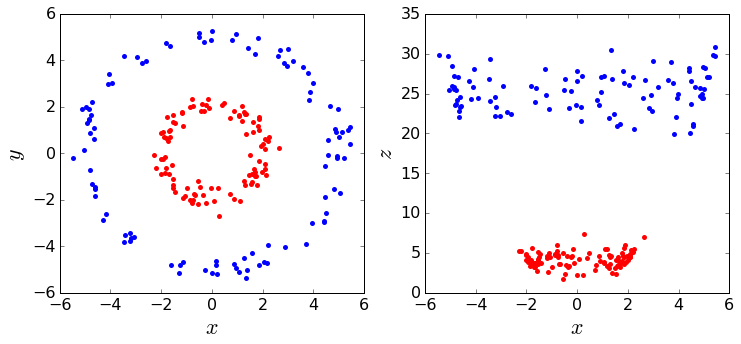

In [181]:
# Reset random seed.
numpy.random.seed(1)
# Toy data to illustrate kernel trick.
N    = 100
Phi1 = numpy.random.uniform(0.0, 2.0*numpy.pi, N)
X1   = 2.0*numpy.cos(Phi1) + numpy.random.normal(0.0, 0.25, N)
Y1   = 2.0*numpy.sin(Phi1) + numpy.random.normal(0.0, 0.25, N)
Phi2 = numpy.random.uniform(0.0, 2.0*numpy.pi, N)
X2   = 5.0*numpy.cos(Phi2) + numpy.random.normal(0.0, 0.25, N)
Y2   = 5.0*numpy.sin(Phi2) + numpy.random.normal(0.0, 0.25, N)
# Build third feature from other two features.
Z1 = X1**2 + Y1**2
Z2 = X2**2 + Y2**2
# Plot data.
plt.figure(18, figsize=(12,5))
plt.subplot(121)
plt.plot(X1, Y1, 'o', ms=5, mew=0, color='red')
plt.plot(X2, Y2, 'o', ms=5, mew=0, color='blue')
plt.xlim(-6.0,6.0)
plt.ylim(-6.0,6.0)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$x$', fontsize=22)
plt.ylabel(r'$y$', fontsize=22)
plt.subplot(122)
plt.plot(X1, Z1, 'o', ms=5, mew=0, color='red')
plt.plot(X2, Z2, 'o', ms=5, mew=0, color='blue')
plt.xlim(-6.0,6.0)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(r'$x$', fontsize=22)
plt.ylabel(r'$z$', fontsize=22)

* Typically, we choose some standard kernel function, e.g., the Gaussian kernel:
\begin{equation}
K(\vec x_m,\vec x_n|\lambda) = \exp\left[-\frac{1}{2}\left(\frac{\vec x_m-\vec x_n}{\lambda}\right)^2\right]
\end{equation}
* Any non-trivial (i.e. useful) kernel will have kernel parameters (such as $\lambda$ for the Gaussian kernel). These values must be chosen very carefully. Usually, cross-validation is used, which makes fine-tuning an SVM very time consuming.
* Warning: Do not embark on the quest for the elusive "perfect kernel". In most situations, any standard kernel will do just fine.
* Aside: The Gaussian kernel builds a new feature space that has <i>infinite</i> dimension. Note that if $D=\infty$, then $h\leq 1+\min\left(D,\frac{r^2}{\Delta^2}\right)$ may (or may not) still save us from the <font color='red'>curse of dimensionality</font>.

In [180]:
# Compute margin width for (x,y,z).
# Combine all features.
Features = numpy.array([numpy.concatenate([X1,X2]),
                        numpy.concatenate([Y1,Y2]),
                        numpy.concatenate([Z1,Z2])])
# Get centre of sphere enclosing all data.
mu = numpy.array([numpy.mean(Features[0]), numpy.mean(Features[1]), numpy.mean(Features[2])])
# Get maximum distance of any point to this centre.
Diff = Features.T - mu
r2   = 0.0
for n in range(len(Diff)):
    d2 = numpy.dot(Diff[n],Diff[n])
    if (d2>r2):
        r2 = d2
print "radius of sphere = "+str(numpy.sqrt(r2))
# Get margin width.
# From the plot, we know that the margin width must be larger than the gap in z.
delta = numpy.min(Z2) - numpy.max(Z1)
print "min margin width = "+str(delta)
# Compute ratio of (r/delta)^2 and compare this to D.
print "(r/delta)^2      = "+str(r2/(delta*delta))
print "D                = 3"

radius of sphere = 16.9467365638
min margin width = 12.5933975991
(r/delta)^2      = 1.81086604954
D                = 3


* So we have used a kernel to achieve perfect classification such that $R_\textrm{emp}=0$ and fast convergence kicks in. How do we find a straight line $\vec w\cdot\vec x+b=0$ that maximises the margin width $\Delta$?
* We have two points $\vec x_1$ and $\vec x_2$ which are support vectors and lie on opposite sides of the margin.
<img src="sketch-margin.png" alt="Drawing" style="width: 600px;"/>
Without loss of generality, we can rescale $\vec w$ and $b$ such that:
\begin{equation}
\vec w\cdot\vec x_1 + b=-1 \qquad\textrm{and}\qquad \vec w\cdot\vec x_2 + b=1
\end{equation}
And subtract:
\begin{equation}
\vec w\cdot\left(\vec x_2-\vec x_1\right)=2
\end{equation}
Geometrically, the scalar product $\vec w\cdot\left(\vec x_2-\vec x_1\right)$ is the product of the length of $\vec w$, which is $||\vec w||$ and the component of $\vec x_2-\vec x_1$ that is perpendicular to the margin, which is the margin width $\Delta$. We thus get:
\begin{equation}
\vec w\cdot\left(\vec x_2-\vec x_1\right)=\Delta ||\vec w||=2 \qquad\Longrightarrow\qquad \Delta=\frac{2}{||\vec w||}
\end{equation}
* In order to maximise the margin width $\Delta$, we thus want to minimise $||\vec w||$. In practice, it will be much easier to minimise $||\vec w||^2=\vec w^2$, which is perfectly equivalent.

### IV.6 LSSVR
* Finding the support vectors in SVM classification is mathematically cumbersome and there is little to be learned from such algebra. Instead, we discuss and implement <font color='red'>least-squares support vector regression</font> (LSSVR), where everything is much easier since simply all training examples become support vectors (i.e., we no longer have to look for them).
* The decision boundary shall be a straight line, $f(\vec x)=\vec w\cdot\vec x+b$, where $\vec w$ and $b$ are our model parameters.
* For some given labelled training data set, we define the Lagrangian:
\begin{equation}
L=\frac{1}{2}||\vec w||^2+\frac{C}{2N}\sum_{n=1}^N\eta_n^2 + \sum_{n=1}^N\alpha_n\left(y_n-\vec w\cdot\vec x_n-b-\eta_n\right)
\end{equation}
Minimising the first term will maximise the margin width and thus produce a model with low test error.<br>
The second term is the training error, which we also want to minimise. It is quadratic since we are doing regression.<br>
$C>0$ is a constant that we have to choose. It is a trade-off between margin maximisation and minimisation of training error.<br>
The last term are Lagrange multipliers, $\alpha_n$, which enforce that the residuals are $\eta_n=y_n-\vec w\cdot\vec x_n-b$.
* Strategy: Note that $\vec w$ lives in feature space, i.e., if we use a Gaussian kernel, $\vec w$ will have infinite dimension. Therefore, we cannot solve for $\vec w$ or $b$ directly (<font color='red'>primal problem</font>). Instead, we will replace $\vec w$ and $b$ in terms of the newly introduced Lagrange multipliers $\alpha_n$ (<font color='red'>dual problem</font>). These will become our new model parameters - one for every training example.

* First, we take the gradient w.r.t. $\vec w$:
\begin{equation}
\vec\nabla_w L=\vec w - \sum_{n=1}^N\alpha_n \vec x_n =0
\qquad\Longrightarrow\qquad
\vec w=\sum_{n=1}^N\alpha_n \vec x_n
\end{equation}
\begin{equation}
\Rightarrow\qquad L=\frac{1}{2}\sum_{m,n=1}^N \alpha_m\alpha_n\vec x_m\cdot\vec x_n+\frac{C}{2N}\sum_{n=1}^N\eta_n^2 + \sum_{n=1}^N\alpha_n\left(y_n-\sum_{m=1}^N\alpha_m\vec x_m\cdot\vec x_n-b-\eta_n\right)
\end{equation}
\begin{equation}
\phantom{\Rightarrow\qquad L}=\frac{1}{2}\sum_{m,n=1}^N \alpha_m\alpha_n\vec x_m\cdot\vec x_n+\frac{C}{2N}\sum_{n=1}^N\eta_n^2 + \sum_{n=1}^N\alpha_n y_n-\sum_{m,n=1}^N\alpha_n\alpha_m\vec x_m\cdot\vec x_n-b\sum_{n=1}^N\alpha_n-\sum_{n=1}^N\alpha_n\eta_n
\end{equation}
\begin{equation}
\phantom{\Rightarrow\qquad L}=-\frac{1}{2}\sum_{m,n=1}^N \alpha_m\alpha_n\vec x_m\cdot\vec x_n+\frac{C}{2N}\sum_{n=1}^N\eta_n^2 + \sum_{n=1}^N\alpha_n y_n-b\sum_{n=1}^N\alpha_n-\sum_{n=1}^N\alpha_n\eta_n
\end{equation}

* Second, we take the gradient w.r.t. $b$:
\begin{equation}
\frac{\partial L}{\partial b}=-\sum_{n=1}^N\alpha_n=0
\qquad\Longrightarrow\qquad
\sum_{n=1}^N\alpha_n=0
\end{equation}
\begin{equation}
\Rightarrow\qquad L=-\frac{1}{2}\sum_{m,n=1}^N \alpha_m\alpha_n\vec x_m\cdot\vec x_n+\frac{C}{2N}\sum_{n=1}^N\eta_n^2 + \sum_{n=1}^N\alpha_n y_n-\sum_{n=1}^N\alpha_n\eta_n+\lambda\left(\sum_{n=1}^N\alpha_n-0\right)
\end{equation}
Where $\lambda$ is yet another Lagrange multiplier that we introduce in order to enforce that $\sum_{n=1}^N\alpha_n=0$.

* Third, we take the gradient w.r.t. residuals $\eta_n$:
\begin{equation}
\frac{\partial L}{\partial\eta_n}=\frac{C}{N}\eta_n - \alpha_n=0
\qquad\Longrightarrow\qquad
\eta_n = \frac{N}{C}\alpha_n
\end{equation}
\begin{equation}
\Rightarrow\qquad L=-\frac{1}{2}\sum_{m,n=1}^N \alpha_m\alpha_n\vec x_m\cdot\vec x_n+\frac{C}{2N}\sum_{n=1}^N\frac{N^2}{C^2}\alpha_n^2 + \sum_{n=1}^N\alpha_n y_n-\sum_{n=1}^N\frac{N}{C}\alpha_n^2+\lambda\sum_{n=1}^N\alpha_n
\end{equation}
\begin{equation}
\phantom{\Rightarrow\qquad L}=-\frac{1}{2}\sum_{m,n=1}^N \alpha_m\alpha_n\vec x_m\cdot\vec x_n-\frac{N}{2C}\sum_{n=1}^N\alpha_n^2 + \sum_{n=1}^N\alpha_n y_n+\lambda\sum_{n=1}^N\alpha_n
\end{equation}
\begin{equation}
\phantom{\Rightarrow\qquad L}=-\frac{1}{2}\sum_{m,n=1}^N \alpha_m\alpha_n\left(\vec x_m\cdot\vec x_n+\frac{N}{C}\delta_{mn}\right) + \sum_{n=1}^N\alpha_n y_n+\lambda\sum_{n=1}^N\alpha_n
\end{equation}

* We have now replaced all model parameters $\vec w$, $b$ and $\eta_n$ in terms of the Lagrange multipliers $\alpha_n$.
* Let us introduce the vectors $\vec\alpha=(\alpha_1,\alpha_2,\ldots,\alpha_N)^T$ and $\vec e=(1,1,\ldots,1)^T$ and the $N\times N$ matrix $M$ with elements $M_{mn}=\vec x_m\cdot\vec x_n+\frac{N}{C}\delta_{mn}$. We can then rewrite the Lagrangian as:
\begin{equation}
L = -\frac{1}{2}\vec\alpha^T\cdot M\cdot\vec\alpha + \vec y\cdot\vec\alpha + \lambda \vec e\cdot\vec\alpha
\end{equation}
* Let us take the gradient w.r.t. $\vec\alpha$:
\begin{equation}
\vec\nabla_\alpha L = -M\cdot\vec\alpha + \vec y + \lambda \vec e=0
\end{equation}
Assuming that $M$ can be inverted, we can solve:
\begin{equation}
\vec\alpha = M^{-1}\cdot\vec y + \lambda M^{-1}\cdot\vec e
\end{equation}
* The Lagrange multiplier $\lambda$ has yet to be eliminated. So let us multiply by $\vec e$ and exploit $\vec e\cdot\vec\alpha=0$:
\begin{equation}
\vec e^T\cdot\vec\alpha =0= \vec e^T\cdot M^{-1}\cdot\vec y + \lambda \vec e^T\cdot M^{-1}\cdot\vec e
\end{equation}
\begin{equation}
\Longrightarrow\quad \lambda=- \frac{\vec e^T\cdot M^{-1}\cdot\vec y}{\vec e^T\cdot M^{-1}\cdot\vec e}
\end{equation}
* The solution thus reads:
\begin{equation}
\vec\alpha = M^{-1}\cdot\vec y - \left(\frac{\vec e^T\cdot M^{-1}\cdot\vec y}{\vec e^T\cdot M^{-1}\cdot\vec e}\right) M^{-1}\cdot\vec e
\end{equation}

* We now have the solution for $\vec\alpha$. Let us now replace $b$ and $\vec w$ in $f(\vec x)=\vec w\cdot\vec x+b$, such that we can make predictions of $y$ for $\vec x$.
* To find $b$, we pick any training example, say the first one, and solve:
\begin{equation}
\eta_1=y_1-f(\vec x_1)=y_1-\vec w\cdot\vec x_1-b=\frac{N}{C}\alpha_1
\qquad\Longrightarrow\qquad
b = y_1-\vec w\cdot\vec x_1-\frac{N}{C}\alpha_1
\end{equation}
Let us insert:
\begin{equation}
f(\vec x)=\vec w\cdot\vec x+b=y_1-\frac{N}{C}\alpha_1+\vec w\cdot\vec x-\vec w\cdot\vec x_1
\end{equation}
\begin{equation}
\phantom{f(\vec x)}=y_1-\frac{N}{C}\alpha_1+\sum_{n=1}^N\alpha_n\vec x_n\cdot\vec x-\sum_{n=1}^N\alpha_n\vec x_n\cdot\vec x_1
\end{equation}
* When we use a kernel function, we simply replace all scalar products $\vec x_i\cdot\vec x_j$ by $K(\vec x_i,\vec x_j)$:
\begin{equation}
M_{mn}=K(\vec x_m,\vec x_n)+\frac{N}{C}\delta_{mn}
\end{equation}
\begin{equation}
f(\vec x)=y_1-\frac{N}{C}\alpha_1+\sum_{n=1}^N\alpha_n K(\vec x_n,\vec x)-\sum_{n=1}^N\alpha_n K(\vec x_n,\vec x_1)
\end{equation}

In [147]:
# Use LSSVR to predict weight as function of height.
# Step 1: Define kernel function.
def kernel(xi,xj):
    sigma = 10.0
    diff  = (xi - xj)/sigma
    #return numpy.exp(-0.5*numpy.dot(diff,diff))  # Gaussian kernel
    return numpy.dot(xi,xj)  # linear kernel
# Step 2: Compute vectors e, y, and matrix M.
C = 100.0  # cost parameter (trade-off between margin maximisation and training error minimisation)
N = len(HeightMale)  # number of training examples.
e = numpy.ones(N)
x = HeightMale
y = WeightMale
M = numpy.empty([N,N])
for m in range(N):
    for n in range(N):
        M[m,n] = kernel(x[m],x[n])
    # Add to diagonal.
    M[m,m] = M[m,m] + N/C
# Step 3: Invert matrix M.
# Naive matrix inversion.
Minv   =  numpy.linalg.inv(M)
# Use a trick to get inverse matrix from more stable Cholesky decomposition.
#cholesky = cho_factor(M)
#Minv     = cho_solve(cholesky, numpy.identity(N))
# Step 4: Compute analytic solution for lambda and alphas.
eTMinv =  numpy.dot(e, Minv)
lag    = -numpy.dot(eTMinv,y)/numpy.dot(eTMinv,e)
alphas =  numpy.dot(Minv, y+lag*e)
# Check that indeed the sum of all alphas equals 0.
print numpy.sum(alphas)

-5.96855898038e-13


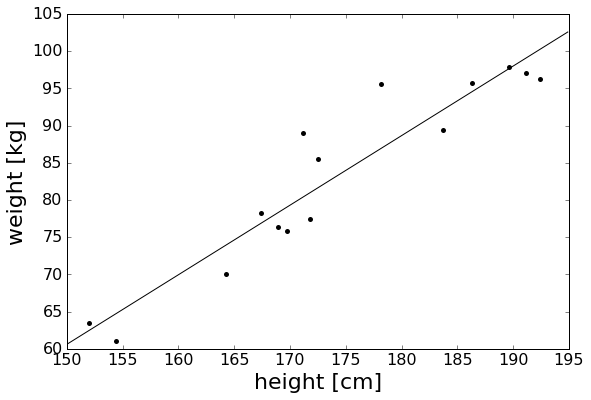

In [148]:
# Predict weight for various heights, i.e., prepare a plot,
X = numpy.arange(150,195,0.1)
Y = numpy.empty(len(X))
for s in range(len(X)):
    # f(x) = w*x + b.
    Y[s] = y[0] - (N/C)*alphas[0]
    for n in range(N):
        Y[s] = Y[s] + alphas[n]*kernel(X[s],x[n]) - alphas[n]*kernel(x[0],x[n])
# Plot data and least-squares solution.
plt.figure(19, figsize=(9,6))
plt.plot(X, Y, '-', lw=1, color='black')
plt.plot(HeightMale, WeightMale, 'o', ms=5, mew=0, color='black')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('height [cm]', fontsize=22)
plt.ylabel('weight [kg]', fontsize=22)